In [1]:
import math
import cv2
import numpy as np
from time import time
import mediapipe as mp
import matplotlib.pyplot as plt
from pyparsing import results

In [2]:
mp_pose = mp.solutions.pose
pose = mp_pose.Pose(static_image_mode=True, min_detection_confidence=0.3, model_complexity=1)
mp_drawing = mp.solutions.drawing_utils

In [3]:
# Function to calculate angle between three landmarks
def calculate_angle(a, b, c):
    a = [a.x, a.y]
    b = [b.x, b.y]
    c = [c.x, c.y]

    ab = [a[0] - b[0], a[1] - b[1]]
    cb = [c[0] - b[0], c[1] - b[1]]

    dot = ab[0] * cb[0] + ab[1] * cb[1]
    mag_ab = math.sqrt(ab[0]**2 + ab[1]**2)
    mag_cb = math.sqrt(cb[0]**2 + cb[1]**2)

    if mag_ab * mag_cb == 0:
        return 0.0

    angle = math.acos(dot / (mag_ab * mag_cb))
    return math.degrees(angle)

In [7]:
# MAIN FUNCTION
def analyze_pose(image_path):
    # Read image
    sample_img = cv2.imread(image_path)
    if sample_img is None:
        print(f"Error: Cannot read image at {image_path}")
        return

    # Process image
    results = pose.process(cv2.cvtColor(sample_img, cv2.COLOR_BGR2RGB))

    if not results.pose_landmarks:
        print("No landmarks detected.")
        return

    # Draw landmarks on copy
    img_copy = sample_img.copy()
    mp_drawing.draw_landmarks(img_copy, results.pose_landmarks, mp_pose.POSE_CONNECTIONS)

    # Show image with landmarks
    plt.figure(figsize=(8, 8))
    plt.title("Pose Landmarks")
    plt.axis('off')
    plt.imshow(cv2.cvtColor(img_copy, cv2.COLOR_BGR2RGB))
    plt.show()

    # ➤ Step 1: Print all 33 normalized landmarks
    print(f"\n Normalized Landmarks for: {image_path}")
    for i in range(33):
        landmark = results.pose_landmarks.landmark[i]
        name = mp_pose.PoseLandmark(i).name
        print(f"{name}: x={landmark.x:.4f}, y={landmark.y:.4f}, z={landmark.z:.4f}, visibility={landmark.visibility:.4f}")

    # ➤ Step 2: Calculate angles
    lm = results.pose_landmarks.landmark
    angles = {}

    angles["Right Knee"] = calculate_angle(lm[mp_pose.PoseLandmark.RIGHT_HIP],
                                           lm[mp_pose.PoseLandmark.RIGHT_KNEE],
                                           lm[mp_pose.PoseLandmark.RIGHT_ANKLE])

    angles["Left Knee"] = calculate_angle(lm[mp_pose.PoseLandmark.LEFT_HIP],
                                          lm[mp_pose.PoseLandmark.LEFT_KNEE],
                                          lm[mp_pose.PoseLandmark.LEFT_ANKLE])

    angles["Right Hip"] = calculate_angle(lm[mp_pose.PoseLandmark.RIGHT_SHOULDER],
                                          lm[mp_pose.PoseLandmark.RIGHT_HIP],
                                          lm[mp_pose.PoseLandmark.RIGHT_KNEE])

    angles["Left Hip"] = calculate_angle(lm[mp_pose.PoseLandmark.LEFT_SHOULDER],
                                         lm[mp_pose.PoseLandmark.LEFT_HIP],
                                         lm[mp_pose.PoseLandmark.LEFT_KNEE])

    angles["Right Elbow"] = calculate_angle(lm[mp_pose.PoseLandmark.RIGHT_SHOULDER],
                                            lm[mp_pose.PoseLandmark.RIGHT_ELBOW],
                                            lm[mp_pose.PoseLandmark.RIGHT_WRIST])

    angles["Left Elbow"] = calculate_angle(lm[mp_pose.PoseLandmark.LEFT_SHOULDER],
                                           lm[mp_pose.PoseLandmark.LEFT_ELBOW],
                                           lm[mp_pose.PoseLandmark.LEFT_WRIST])

    angles["Right Shoulder"] = calculate_angle(lm[mp_pose.PoseLandmark.RIGHT_ELBOW],
                                               lm[mp_pose.PoseLandmark.RIGHT_SHOULDER],
                                               lm[mp_pose.PoseLandmark.RIGHT_HIP])

    angles["Left Shoulder"] = calculate_angle(lm[mp_pose.PoseLandmark.LEFT_ELBOW],
                                              lm[mp_pose.PoseLandmark.LEFT_SHOULDER],
                                              lm[mp_pose.PoseLandmark.LEFT_HIP])

    angles["Right Ankle (Heel-to-Toe)"] = calculate_angle(lm[mp_pose.PoseLandmark.RIGHT_KNEE],
                                                          lm[mp_pose.PoseLandmark.RIGHT_ANKLE],
                                                          lm[mp_pose.PoseLandmark.RIGHT_FOOT_INDEX])

    angles["Left Ankle (Heel-to-Toe)"] = calculate_angle(lm[mp_pose.PoseLandmark.LEFT_KNEE],
                                                         lm[mp_pose.PoseLandmark.LEFT_ANKLE],
                                                         lm[mp_pose.PoseLandmark.LEFT_FOOT_INDEX])

    # ➤ Step 3: Print joint angles
    print(f"\nJoint Angles for: {image_path}")
    for joint, angle in angles.items():
        print(f"{joint}: {angle:.2f}°")

    

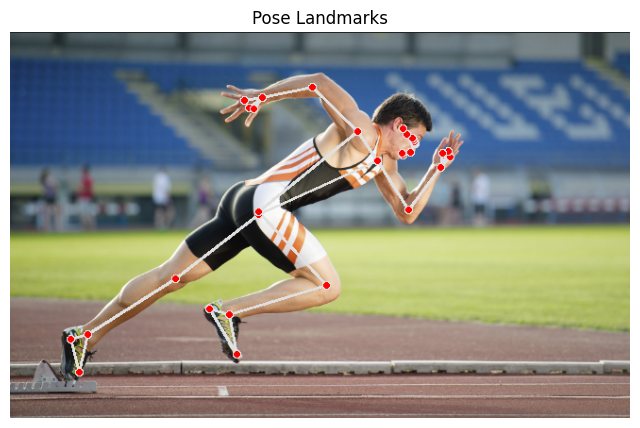


 Normalized Landmarks for: Toe Off2.png
NOSE: x=0.6456, y=0.3117, z=-0.1041, visibility=1.0000
LEFT_EYE_INNER: x=0.6531, y=0.2887, z=-0.0789, visibility=1.0000
LEFT_EYE: x=0.6528, y=0.2877, z=-0.0789, visibility=1.0000
LEFT_EYE_OUTER: x=0.6525, y=0.2865, z=-0.0788, visibility=1.0000
RIGHT_EYE_INNER: x=0.6517, y=0.2845, z=-0.1187, visibility=1.0000
RIGHT_EYE: x=0.6504, y=0.2804, z=-0.1187, visibility=1.0000
RIGHT_EYE_OUTER: x=0.6488, y=0.2760, z=-0.1187, visibility=1.0000
LEFT_EAR: x=0.6406, y=0.2652, z=0.0496, visibility=1.0000
RIGHT_EAR: x=0.6346, y=0.2515, z=-0.1380, visibility=1.0000
MOUTH_LEFT: x=0.6344, y=0.3201, z=-0.0547, visibility=1.0000
MOUTH_RIGHT: x=0.6324, y=0.3151, z=-0.1090, visibility=1.0000
LEFT_SHOULDER: x=0.5934, y=0.3331, z=0.1822, visibility=1.0000
RIGHT_SHOULDER: x=0.5613, y=0.2590, z=-0.1907, visibility=1.0000
LEFT_ELBOW: x=0.6427, y=0.4603, z=0.2620, visibility=0.9923
RIGHT_ELBOW: x=0.4873, y=0.1443, z=-0.3807, visibility=0.9984
LEFT_WRIST: x=0.6941, y=0.3518, 

In [8]:
# Call for a single image
analyze_pose("Toe Off2.png")

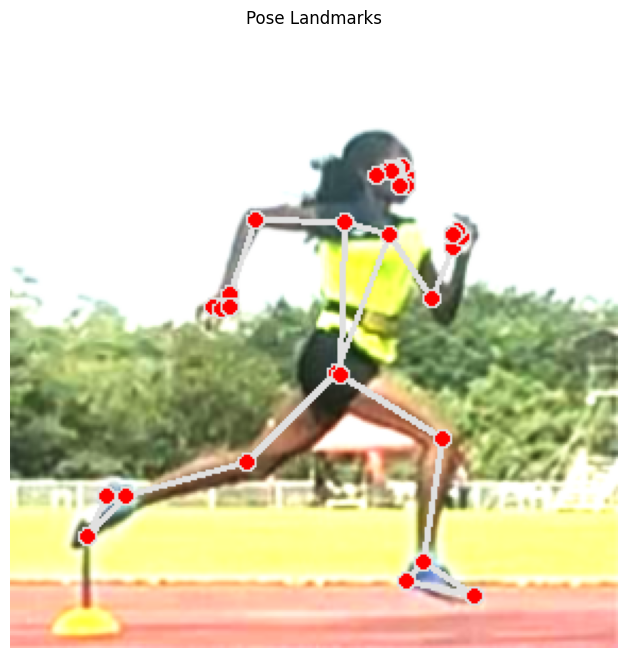


 Normalized Landmarks for: E:\Evoq\Sprinting video\Screenshot 2025-08-26 115623.PNG
NOSE: x=0.6511, y=0.2336, z=0.0037, visibility=1.0000
LEFT_EYE_INNER: x=0.6440, y=0.2193, z=0.0384, visibility=1.0000
LEFT_EYE: x=0.6447, y=0.2188, z=0.0385, visibility=1.0000
LEFT_EYE_OUTER: x=0.6452, y=0.2184, z=0.0386, visibility=1.0000
RIGHT_EYE_INNER: x=0.6362, y=0.2207, z=-0.0213, visibility=1.0000
RIGHT_EYE: x=0.6312, y=0.2216, z=-0.0213, visibility=1.0000
RIGHT_EYE_OUTER: x=0.6251, y=0.2227, z=-0.0214, visibility=1.0000
LEFT_EAR: x=0.6285, y=0.2254, z=0.1993, visibility=1.0000
RIGHT_EAR: x=0.6042, y=0.2311, z=-0.0739, visibility=1.0000
MOUTH_LEFT: x=0.6525, y=0.2487, z=0.0658, visibility=1.0000
MOUTH_RIGHT: x=0.6412, y=0.2511, z=-0.0128, visibility=1.0000
LEFT_SHOULDER: x=0.6245, y=0.3278, z=0.3706, visibility=1.0000
RIGHT_SHOULDER: x=0.5514, y=0.3076, z=-0.1536, visibility=1.0000
LEFT_ELBOW: x=0.6958, y=0.4329, z=0.3315, visibility=0.8329
RIGHT_ELBOW: x=0.4035, y=0.3050, z=-0.1513, visibility=

In [8]:
analyze_pose(r"E:\Evoq\Sprinting video\Screenshot 2025-08-26 115623.PNG")

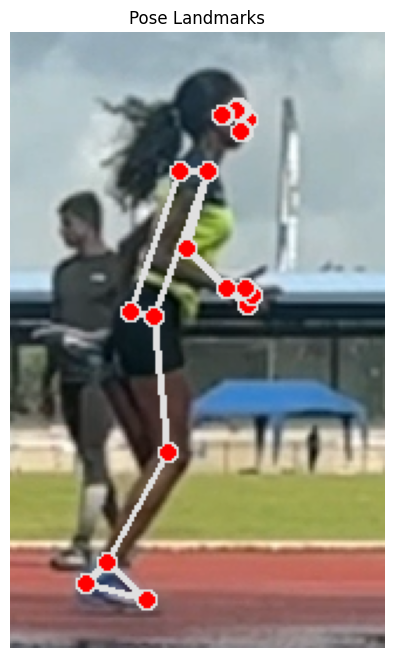


 Normalized Landmarks for: E:\new screenshots\Screenshot 2025-08-26 120336.png
NOSE: x=0.6367, y=0.1434, z=0.0649, visibility=0.9990
LEFT_EYE_INNER: x=0.6172, y=0.1261, z=0.0921, visibility=0.9993
LEFT_EYE: x=0.6141, y=0.1257, z=0.0919, visibility=0.9993
LEFT_EYE_OUTER: x=0.6108, y=0.1255, z=0.0918, visibility=0.9995
RIGHT_EYE_INNER: x=0.6143, y=0.1267, z=0.0036, visibility=0.9993
RIGHT_EYE: x=0.6096, y=0.1267, z=0.0035, visibility=0.9991
RIGHT_EYE_OUTER: x=0.6046, y=0.1267, z=0.0032, visibility=0.9994
LEFT_EAR: x=0.5718, y=0.1334, z=0.2174, visibility=0.9989
RIGHT_EAR: x=0.5676, y=0.1351, z=-0.1757, visibility=0.9992
MOUTH_LEFT: x=0.6219, y=0.1619, z=0.1223, visibility=0.9983
MOUTH_RIGHT: x=0.6187, y=0.1618, z=0.0082, visibility=0.9989
LEFT_SHOULDER: x=0.4561, y=0.2270, z=0.4544, visibility=0.9967
RIGHT_SHOULDER: x=0.5253, y=0.2276, z=-0.4120, visibility=0.9998
LEFT_ELBOW: x=0.3305, y=0.3432, z=0.5078, visibility=0.0506
RIGHT_ELBOW: x=0.4704, y=0.3506, z=-0.4440, visibility=0.9700
LE

In [9]:
analyze_pose(r"E:\new screenshots\Screenshot 2025-08-26 120336.png")

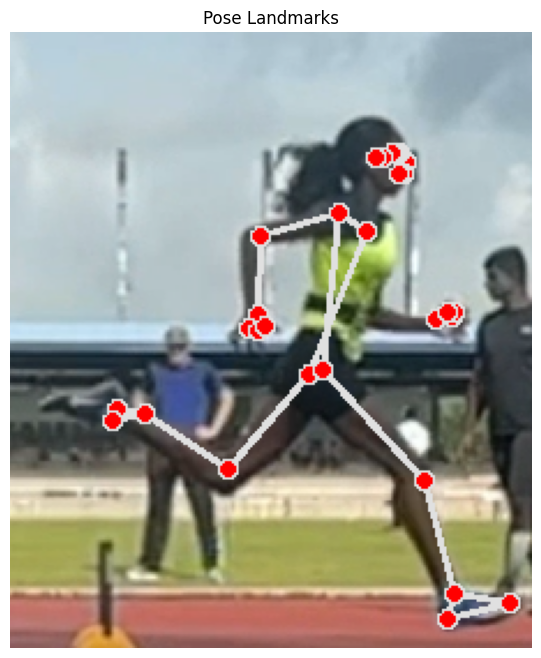


 Normalized Landmarks for: E:\new screenshots\Screenshot 2025-08-26 120649.png
NOSE: x=0.7572, y=0.2128, z=-0.0689, visibility=1.0000
LEFT_EYE_INNER: x=0.7461, y=0.1974, z=-0.0312, visibility=1.0000
LEFT_EYE: x=0.7450, y=0.1970, z=-0.0313, visibility=1.0000
LEFT_EYE_OUTER: x=0.7436, y=0.1964, z=-0.0313, visibility=1.0000
RIGHT_EYE_INNER: x=0.7415, y=0.1981, z=-0.1018, visibility=1.0000
RIGHT_EYE: x=0.7370, y=0.1981, z=-0.1019, visibility=1.0000
RIGHT_EYE_OUTER: x=0.7319, y=0.1981, z=-0.1019, visibility=1.0000
LEFT_EAR: x=0.7160, y=0.2023, z=0.1362, visibility=1.0000
RIGHT_EAR: x=0.7014, y=0.2058, z=-0.1814, visibility=1.0000
MOUTH_LEFT: x=0.7527, y=0.2307, z=0.0003, visibility=1.0000
MOUTH_RIGHT: x=0.7463, y=0.2310, z=-0.0919, visibility=1.0000
LEFT_SHOULDER: x=0.6846, y=0.3228, z=0.3544, visibility=1.0000
RIGHT_SHOULDER: x=0.6289, y=0.2933, z=-0.2862, visibility=1.0000
LEFT_ELBOW: x=0.6905, y=0.4481, z=0.5888, visibility=0.4352
RIGHT_ELBOW: x=0.4805, y=0.3315, z=-0.4658, visibility=0

In [11]:
analyze_pose(r"E:\new screenshots\Screenshot 2025-08-26 120649.png")

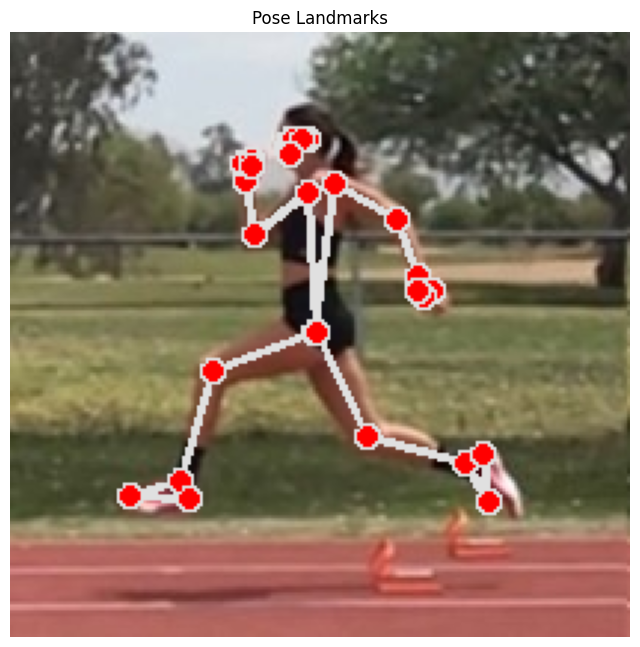


 Normalized Landmarks for: MVP.jpg
NOSE: x=0.4460, y=0.1943, z=-0.1843, visibility=0.9999
LEFT_EYE_INNER: x=0.4523, y=0.1794, z=-0.2126, visibility=1.0000
LEFT_EYE: x=0.4542, y=0.1788, z=-0.2126, visibility=1.0000
LEFT_EYE_OUTER: x=0.4562, y=0.1781, z=-0.2126, visibility=1.0000
RIGHT_EYE_INNER: x=0.4521, y=0.1792, z=-0.1498, visibility=0.9999
RIGHT_EYE: x=0.4536, y=0.1787, z=-0.1498, visibility=0.9999
RIGHT_EYE_OUTER: x=0.4551, y=0.1781, z=-0.1497, visibility=0.9999
LEFT_EAR: x=0.4795, y=0.1794, z=-0.2671, visibility=1.0000
RIGHT_EAR: x=0.4737, y=0.1806, z=0.0095, visibility=0.9999
MOUTH_LEFT: x=0.4528, y=0.2058, z=-0.2022, visibility=0.9999
MOUTH_RIGHT: x=0.4527, y=0.2053, z=-0.1211, visibility=0.9998
LEFT_SHOULDER: x=0.5216, y=0.2502, z=-0.3622, visibility=1.0000
RIGHT_SHOULDER: x=0.4816, y=0.2661, z=0.2639, visibility=0.9994
LEFT_ELBOW: x=0.6246, y=0.3091, z=-0.5812, visibility=0.9999
RIGHT_ELBOW: x=0.3940, y=0.3369, z=0.4857, visibility=0.8768
LEFT_WRIST: x=0.6601, y=0.4042, z=-0.

In [53]:
analyze_pose("MVP.jpg")

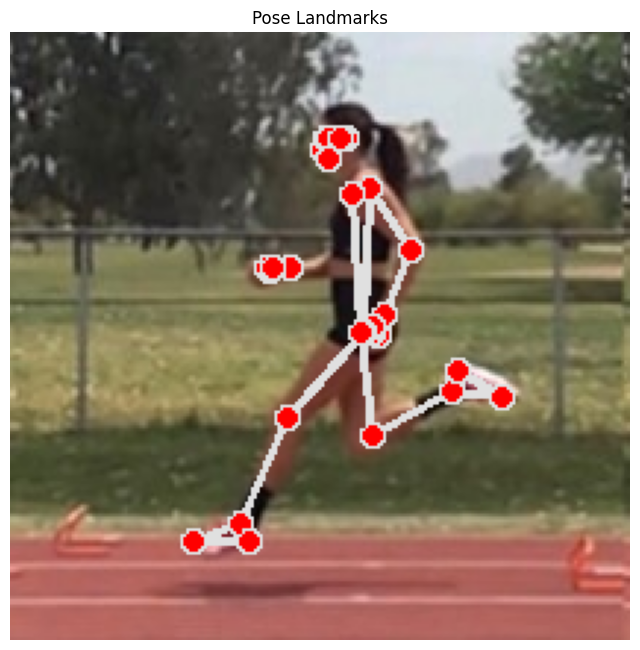


 Normalized Landmarks for: Strike.JPG
NOSE: x=0.5048, y=0.1942, z=0.0008, visibility=1.0000
LEFT_EYE_INNER: x=0.5117, y=0.1766, z=-0.0271, visibility=1.0000
LEFT_EYE: x=0.5143, y=0.1761, z=-0.0271, visibility=1.0000
LEFT_EYE_OUTER: x=0.5173, y=0.1753, z=-0.0272, visibility=1.0000
RIGHT_EYE_INNER: x=0.5107, y=0.1762, z=0.0311, visibility=1.0000
RIGHT_EYE: x=0.5124, y=0.1755, z=0.0310, visibility=1.0000
RIGHT_EYE_OUTER: x=0.5141, y=0.1745, z=0.0310, visibility=1.0000
LEFT_EAR: x=0.5406, y=0.1766, z=-0.1038, visibility=1.0000
RIGHT_EAR: x=0.5347, y=0.1758, z=0.1486, visibility=1.0000
MOUTH_LEFT: x=0.5146, y=0.2099, z=-0.0239, visibility=1.0000
MOUTH_RIGHT: x=0.5128, y=0.2096, z=0.0498, visibility=1.0000
LEFT_SHOULDER: x=0.5812, y=0.2589, z=-0.2607, visibility=1.0000
RIGHT_SHOULDER: x=0.5536, y=0.2677, z=0.3556, visibility=0.9995
LEFT_ELBOW: x=0.6471, y=0.3606, z=-0.3730, visibility=0.9996
RIGHT_ELBOW: x=0.5370, y=0.3792, z=0.5174, visibility=0.4735
LEFT_WRIST: x=0.6050, y=0.4663, z=-0.40

In [54]:
analyze_pose("Strike.JPG")

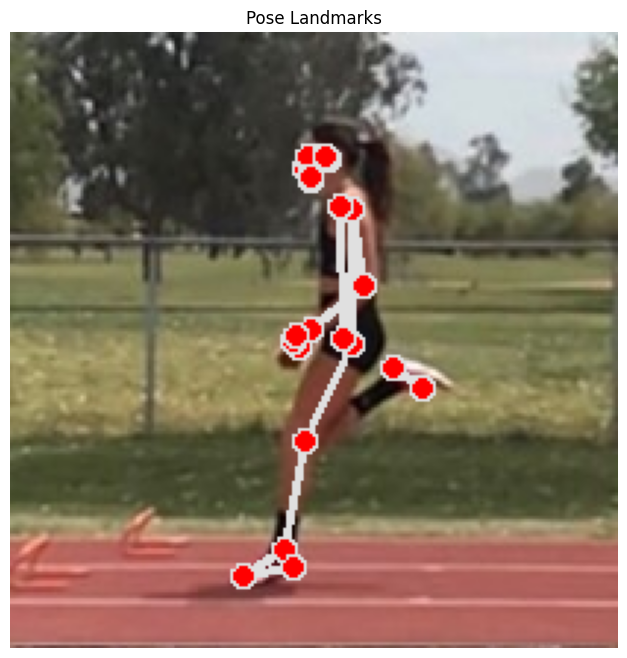


 Normalized Landmarks for: Touch-Down.JPG
NOSE: x=0.4842, y=0.2224, z=-0.1984, visibility=0.9995
LEFT_EYE_INNER: x=0.4902, y=0.2054, z=-0.2334, visibility=0.9996
LEFT_EYE: x=0.4927, y=0.2047, z=-0.2334, visibility=0.9997
LEFT_EYE_OUTER: x=0.4957, y=0.2038, z=-0.2334, visibility=0.9998
RIGHT_EYE_INNER: x=0.4891, y=0.2049, z=-0.1691, visibility=0.9993
RIGHT_EYE: x=0.4906, y=0.2040, z=-0.1692, visibility=0.9992
RIGHT_EYE_OUTER: x=0.4924, y=0.2028, z=-0.1692, visibility=0.9995
LEFT_EAR: x=0.5245, y=0.2054, z=-0.3194, visibility=0.9997
RIGHT_EAR: x=0.5179, y=0.2044, z=-0.0352, visibility=0.9986
MOUTH_LEFT: x=0.4970, y=0.2384, z=-0.2250, visibility=0.9998
MOUTH_RIGHT: x=0.4948, y=0.2376, z=-0.1424, visibility=0.9992
LEFT_SHOULDER: x=0.5651, y=0.2898, z=-0.4493, visibility=1.0000
RIGHT_SHOULDER: x=0.5446, y=0.2836, z=0.1554, visibility=0.9983
LEFT_ELBOW: x=0.5811, y=0.4121, z=-0.5184, visibility=0.9961
RIGHT_ELBOW: x=0.5570, y=0.4076, z=0.2033, visibility=0.0660
LEFT_WRIST: x=0.4952, y=0.484

In [55]:
analyze_pose("Touch-Down.JPG")

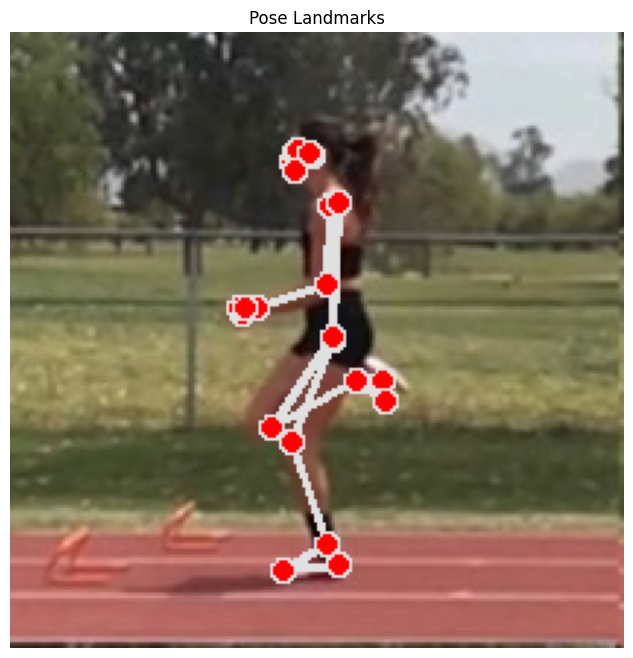


 Normalized Landmarks for: Full Support.JPG
NOSE: x=0.4574, y=0.2123, z=-0.0994, visibility=0.9999
LEFT_EYE_INNER: x=0.4638, y=0.1969, z=-0.1378, visibility=0.9999
LEFT_EYE: x=0.4660, y=0.1965, z=-0.1378, visibility=0.9999
LEFT_EYE_OUTER: x=0.4683, y=0.1960, z=-0.1379, visibility=1.0000
RIGHT_EYE_INNER: x=0.4639, y=0.1961, z=-0.0733, visibility=0.9999
RIGHT_EYE: x=0.4661, y=0.1952, z=-0.0733, visibility=0.9999
RIGHT_EYE_OUTER: x=0.4684, y=0.1942, z=-0.0733, visibility=0.9999
LEFT_EAR: x=0.4910, y=0.1996, z=-0.2349, visibility=0.9999
RIGHT_EAR: x=0.4896, y=0.1975, z=0.0528, visibility=0.9999
MOUTH_LEFT: x=0.4653, y=0.2258, z=-0.1289, visibility=0.9999
MOUTH_RIGHT: x=0.4645, y=0.2245, z=-0.0456, visibility=0.9997
LEFT_SHOULDER: x=0.5197, y=0.2830, z=-0.3902, visibility=1.0000
RIGHT_SHOULDER: x=0.5368, y=0.2772, z=0.2341, visibility=0.9995
LEFT_ELBOW: x=0.5166, y=0.4094, z=-0.4620, visibility=0.9962
RIGHT_ELBOW: x=0.5362, y=0.4033, z=0.2689, visibility=0.1611
LEFT_WRIST: x=0.4035, y=0.44

In [56]:
analyze_pose("Full Support.JPG")

In [10]:
def classify_pose(angles):
    rk, lk = angles["Right Knee"], angles["Left Knee"]
    rh, lh = angles["Right Hip"], angles["Left Hip"]
    re, le = angles["Right Elbow"], angles["Left Elbow"]
    rs, ls = angles["Right Shoulder"], angles["Left Shoulder"]

    pose_scores = {
        "Toe Off": 0,
        "MVP": 0,
        "Strike": 0,
        "Touch Down": 0,
        "Full Support": 0
    }

    rules = {
        "Toe Off": [
            75 < rk < 90, 160 < lk < 175, 85 < rh < 110, 150 < lh < 170,
            80 < re < 100, 100 < le < 130, 90 < rs < 110, 65 < ls < 85
        ],
        "MVP": [
            120 < rk < 140, 120 < lk < 140, 160 < rh < 175, 110 < lh < 130,
            60 < re < 75, 130 < le < 150, 55 < rs < 70, 65 < ls < 85
        ],
        "Strike": [
            55 < rk < 75, 150 < lk < 165, 170 < rh < 180, 130 < lh < 140,
            100 < re < 115, 115 < le < 130, 10 < rs < 25, 30 < ls < 45
        ],
        "Touch Down": [
            45 < rk < 60, 155 < lk < 170, 150 < rh < 170, 145 < lh < 160,
            130 < re < 150, 105 < le < 120, 0 < rs < 10, 10 < ls < 20
        ],
        "Full Support": [
            15 < rk < 30, 135 < lk < 160, 130 < rh < 145, 150 < lh < 165,
            155 < re < 175, 100 < le < 130, 0 < rs < 10, 5 < ls < 15
        ]
    }

    # Count how many conditions each pose satisfies
    for pose_name, conditions in rules.items():
        pose_scores[pose_name] = sum(conditions)

    print("Confidence Scores:", pose_scores)

    # Check if all scores are less than 2
    if all(score < 2 for score in pose_scores.values()):
        return "Unknown Pose", 0

    # Otherwise, return pose with max score
    best_pose = max(pose_scores, key=pose_scores.get)
    best_score = pose_scores[best_pose]
    max_possible = len(rules[best_pose])
    confidence = round((best_score / max_possible) * 100, 1)

    return best_pose, confidence


In [11]:
def analyze_and_classify_pose(image_path):
    # Read and process image
    image = cv2.imread(image_path)
    if image is None:
        print(f"Image not found at: {image_path}")
        return

    results = pose.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    if not results.pose_landmarks:
        print("No pose detected.")
        return

    lm = results.pose_landmarks.landmark
    angles = {}

    # Recalculate angles using your logic
    angles["Right Knee"] = calculate_angle(lm[mp_pose.PoseLandmark.RIGHT_HIP],
                                           lm[mp_pose.PoseLandmark.RIGHT_KNEE],
                                           lm[mp_pose.PoseLandmark.RIGHT_ANKLE])
    angles["Left Knee"] = calculate_angle(lm[mp_pose.PoseLandmark.LEFT_HIP],
                                          lm[mp_pose.PoseLandmark.LEFT_KNEE],
                                          lm[mp_pose.PoseLandmark.LEFT_ANKLE])
    angles["Right Hip"] = calculate_angle(lm[mp_pose.PoseLandmark.RIGHT_SHOULDER],
                                          lm[mp_pose.PoseLandmark.RIGHT_HIP],
                                          lm[mp_pose.PoseLandmark.RIGHT_KNEE])
    angles["Left Hip"] = calculate_angle(lm[mp_pose.PoseLandmark.LEFT_SHOULDER],
                                         lm[mp_pose.PoseLandmark.LEFT_HIP],
                                         lm[mp_pose.PoseLandmark.LEFT_KNEE])
    angles["Right Elbow"] = calculate_angle(lm[mp_pose.PoseLandmark.RIGHT_SHOULDER],
                                            lm[mp_pose.PoseLandmark.RIGHT_ELBOW],
                                            lm[mp_pose.PoseLandmark.RIGHT_WRIST])
    angles["Left Elbow"] = calculate_angle(lm[mp_pose.PoseLandmark.LEFT_SHOULDER],
                                           lm[mp_pose.PoseLandmark.LEFT_ELBOW],
                                           lm[mp_pose.PoseLandmark.LEFT_WRIST])
    angles["Right Shoulder"] = calculate_angle(lm[mp_pose.PoseLandmark.RIGHT_ELBOW],
                                               lm[mp_pose.PoseLandmark.RIGHT_SHOULDER],
                                               lm[mp_pose.PoseLandmark.RIGHT_HIP])
    angles["Left Shoulder"] = calculate_angle(lm[mp_pose.PoseLandmark.LEFT_ELBOW],
                                              lm[mp_pose.PoseLandmark.LEFT_SHOULDER],
                                              lm[mp_pose.PoseLandmark.LEFT_HIP])
    angles["Right Ankle (Heel-to-Toe)"] = calculate_angle(lm[mp_pose.PoseLandmark.RIGHT_KNEE],
                                                          lm[mp_pose.PoseLandmark.RIGHT_ANKLE],
                                                          lm[mp_pose.PoseLandmark.RIGHT_FOOT_INDEX])
    angles["Left Ankle (Heel-to-Toe)"] = calculate_angle(lm[mp_pose.PoseLandmark.LEFT_KNEE],
                                                         lm[mp_pose.PoseLandmark.LEFT_ANKLE],
                                                         lm[mp_pose.PoseLandmark.LEFT_FOOT_INDEX])

    # Classify
    label, confidence = classify_pose(angles)
    print(f"\n⏱ Detected Pose: {label} ({confidence}%)")


    # Draw landmarks and label
    image_out = image.copy()
    mp_drawing.draw_landmarks(image_out, results.pose_landmarks, mp_pose.POSE_CONNECTIONS)
    cv2.putText(image_out, f"{label} ({confidence}%)", (10, 40), cv2.FONT_HERSHEY_SIMPLEX, 1.2,
            (0, 255, 0) if label != 'Unknown Pose' else (0, 0, 255), 3)


    # Show image
    plt.figure(figsize=(8, 8))
    plt.title(f"Classified Pose: {label}")
    plt.axis('off')
    plt.imshow(cv2.cvtColor(image_out, cv2.COLOR_BGR2RGB))
    plt.show()


Confidence Scores: {'Toe Off': 5, 'MVP': 0, 'Strike': 3, 'Touch Down': 2, 'Full Support': 2}

⏱ Detected Pose: Toe Off (62.5%)


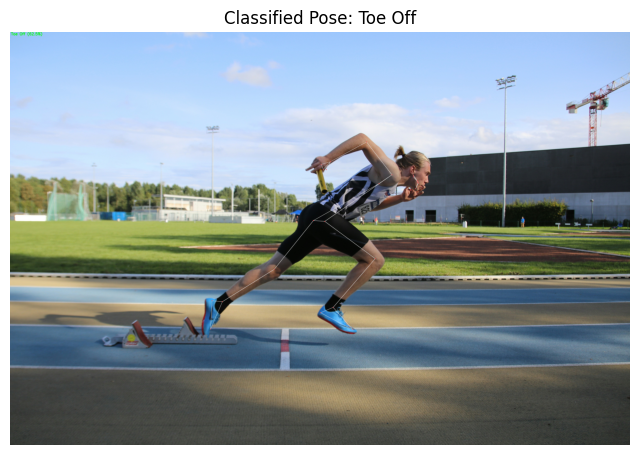

In [12]:
analyze_and_classify_pose("Toe Off.jpg")

Confidence Scores: {'Toe Off': 4, 'MVP': 1, 'Strike': 1, 'Touch Down': 0, 'Full Support': 0}

⏱ Detected Pose: Toe Off (50.0%)


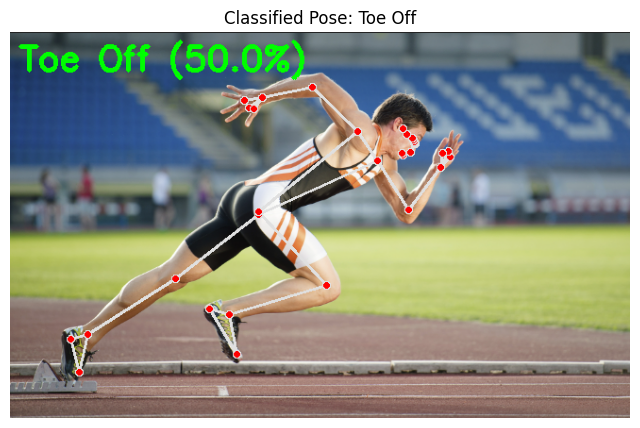

In [63]:
analyze_and_classify_pose("Toe Off2.png")

Confidence Scores: {'Toe Off': 0, 'MVP': 2, 'Strike': 0, 'Touch Down': 1, 'Full Support': 0}

⏱ Detected Pose: MVP (25.0%)


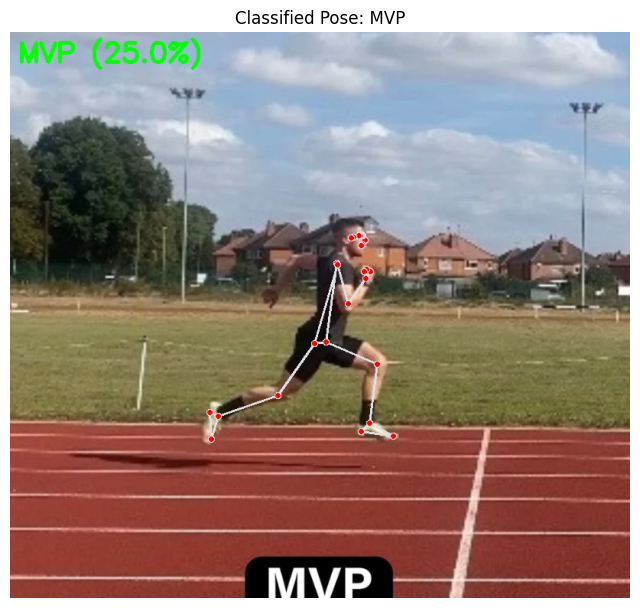

In [64]:
analyze_and_classify_pose("MVP2.png")

In [14]:
def analyze_video_and_classify(video_path):
    cap = cv2.VideoCapture(video_path)

    if not cap.isOpened():
        print("Error: Could not open video.")
        return

    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break

        # Resize frame for better UI
        frame = cv2.resize(frame, (640, 480))

        # Convert to RGB for MediaPipe
        image_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        results = pose.process(image_rgb)

        label = 'No Pose Detected'
        confidence = 0

        if results.pose_landmarks:
            lm = results.pose_landmarks.landmark

            # Calculate angles
            angles = {
                "Right Knee": calculate_angle(lm[mp_pose.PoseLandmark.RIGHT_HIP],
                                              lm[mp_pose.PoseLandmark.RIGHT_KNEE],
                                              lm[mp_pose.PoseLandmark.RIGHT_ANKLE]),
                "Left Knee": calculate_angle(lm[mp_pose.PoseLandmark.LEFT_HIP],
                                             lm[mp_pose.PoseLandmark.LEFT_KNEE],
                                             lm[mp_pose.PoseLandmark.LEFT_ANKLE]),
                "Right Hip": calculate_angle(lm[mp_pose.PoseLandmark.RIGHT_SHOULDER],
                                             lm[mp_pose.PoseLandmark.RIGHT_HIP],
                                             lm[mp_pose.PoseLandmark.RIGHT_KNEE]),
                "Left Hip": calculate_angle(lm[mp_pose.PoseLandmark.LEFT_SHOULDER],
                                            lm[mp_pose.PoseLandmark.LEFT_HIP],
                                            lm[mp_pose.PoseLandmark.LEFT_KNEE]),
                "Right Elbow": calculate_angle(lm[mp_pose.PoseLandmark.RIGHT_SHOULDER],
                                               lm[mp_pose.PoseLandmark.RIGHT_ELBOW],
                                               lm[mp_pose.PoseLandmark.RIGHT_WRIST]),
                "Left Elbow": calculate_angle(lm[mp_pose.PoseLandmark.LEFT_SHOULDER],
                                              lm[mp_pose.PoseLandmark.LEFT_ELBOW],
                                              lm[mp_pose.PoseLandmark.LEFT_WRIST]),
                "Right Shoulder": calculate_angle(lm[mp_pose.PoseLandmark.RIGHT_ELBOW],
                                                  lm[mp_pose.PoseLandmark.RIGHT_SHOULDER],
                                                  lm[mp_pose.PoseLandmark.RIGHT_HIP]),
                "Left Shoulder": calculate_angle(lm[mp_pose.PoseLandmark.LEFT_ELBOW],
                                                 lm[mp_pose.PoseLandmark.LEFT_SHOULDER],
                                                 lm[mp_pose.PoseLandmark.LEFT_HIP]),
                "Right Ankle (Heel-to-Toe)": calculate_angle(lm[mp_pose.PoseLandmark.RIGHT_KNEE],
                                                             lm[mp_pose.PoseLandmark.RIGHT_ANKLE],
                                                             lm[mp_pose.PoseLandmark.RIGHT_FOOT_INDEX]),
                "Left Ankle (Heel-to-Toe)": calculate_angle(lm[mp_pose.PoseLandmark.LEFT_KNEE],
                                                            lm[mp_pose.PoseLandmark.LEFT_ANKLE],
                                                            lm[mp_pose.PoseLandmark.LEFT_FOOT_INDEX])
            }

            # Classify the pose and get confidence
            label, confidence = classify_pose(angles)
            label_text = f"{label} ({confidence}%)"

            # Draw pose landmarks
            mp_drawing.draw_landmarks(frame, results.pose_landmarks, mp_pose.POSE_CONNECTIONS)

        else:
            label_text = label

        # Draw label and confidence on frame
        color = (0, 255, 0) if label != 'Unknown Pose' else (0, 0, 255)
        cv2.putText(frame, label_text, (20, 40), cv2.FONT_HERSHEY_SIMPLEX, 1, color, 2, cv2.LINE_AA)

        # Show the result
        cv2.imshow('Pose Classification', frame)

        # Press 'q' to exit
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

    cap.release()
    cv2.destroyAllWindows()



In [15]:
analyze_video_and_classify(r"C:\Users\yenul\PycharmProjects\YOLO_speed_tracker\output_masked.mp4")

Confidence Scores: {'Toe Off': 1, 'MVP': 1, 'Strike': 1, 'Touch Down': 0, 'Full Support': 0}
Confidence Scores: {'Toe Off': 1, 'MVP': 0, 'Strike': 1, 'Touch Down': 1, 'Full Support': 0}
Confidence Scores: {'Toe Off': 0, 'MVP': 1, 'Strike': 1, 'Touch Down': 2, 'Full Support': 1}
Confidence Scores: {'Toe Off': 3, 'MVP': 2, 'Strike': 0, 'Touch Down': 2, 'Full Support': 0}
Confidence Scores: {'Toe Off': 1, 'MVP': 1, 'Strike': 1, 'Touch Down': 3, 'Full Support': 0}
Confidence Scores: {'Toe Off': 0, 'MVP': 1, 'Strike': 2, 'Touch Down': 2, 'Full Support': 1}
Confidence Scores: {'Toe Off': 0, 'MVP': 1, 'Strike': 1, 'Touch Down': 2, 'Full Support': 1}
Confidence Scores: {'Toe Off': 1, 'MVP': 1, 'Strike': 1, 'Touch Down': 3, 'Full Support': 1}
Confidence Scores: {'Toe Off': 1, 'MVP': 1, 'Strike': 1, 'Touch Down': 3, 'Full Support': 0}
Confidence Scores: {'Toe Off': 2, 'MVP': 2, 'Strike': 0, 'Touch Down': 1, 'Full Support': 2}
Confidence Scores: {'Toe Off': 0, 'MVP': 1, 'Strike': 1, 'Touch Down':

Compute the FPS count when give video using openCV

In [3]:
import cv2
def get_fps_opencv(file_path):
    cap = cv2.VideoCapture(file_path)
    fps = cap.get(cv2.CAP_PROP_FPS)
    cap.release()
    
    # Validate FPS (if metadata is suspicious)
    if fps > 300 or fps <= 0:  # iPhone slow-mo or corrupted metadata
        cap = cv2.VideoCapture(file_path)
        frames = 0
        start = cv2.getTickCount()
        while True:
            ret, _ = cap.read()
            if not ret:
                break
            frames += 1
        duration = (cv2.getTickCount() - start) / cv2.getTickFrequency()
        fps = frames / duration if duration > 0 else fps  # Fallback to metadata
        cap.release()
    return fps

fps = get_fps_opencv(r"E:\Evoq\Sprinting video\useful\IMG_0795 new.mov")
print(f"FPS (OpenCV + Validation): {fps}")

FPS (OpenCV + Validation): 30.0


Find the velocity of sprinter, Mark the correct distance using homography
and calculate speed using time gap


In [117]:
# this one has screen size issue

import cv2
import numpy as np
import math
import mediapipe as mp

# ========= USER SETTINGS =========
VIDEO_PATH = r"E:\Evoq\Sprinting video\chinthaka ayya\IMG_2809.MOV" #change to your file
RECT_LEN_M = 10.0   # 10 m between start & finish cones (along run)
RECT_WIDTH_M = 1.0  # 2 m lane width (across cones)
SMOOTH_WINDOW = 5   # median window for light smoothing of Y(t) for OFFLINE check
SHOW_WARPED = False # optional top-down preview window
POSE_MIN_DET = 0.5
POSE_MIN_TRK = 0.5
MODEL_COMPLEXITY = 2
# =================================

mp_pose = mp.solutions.pose
mp_drawing = mp.solutions.drawing_utils

def click_points(win, frame, num=4, prompt="Click points"):
    pts = []
    clone = frame.copy()
    def _cb(event, x, y, flags, param):
        if event == cv2.EVENT_LBUTTONDOWN and len(pts) < num:
            pts.append((x, y))
    cv2.namedWindow(win, cv2.WINDOW_NORMAL)
    cv2.setMouseCallback(win, _cb)
    while True:
        disp = clone.copy()
        cv2.putText(disp, f"{prompt} ({len(pts)}/{num})", (20, 40),
                    cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255,0), 2, cv2.LINE_AA)
        for i,p in enumerate(pts):
            cv2.circle(disp, p, 6, (0,0,255), -1)
            cv2.putText(disp, str(i+1), (p[0]+8, p[1]-8),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0,0,255), 2, cv2.LINE_AA)
        cv2.imshow(win, disp)
        key = cv2.waitKey(20) & 0xFF
        if key == 27:
            pts = []
            break
        if len(pts) == num:
            break
    cv2.destroyWindow(win)
    return np.array(pts, dtype=np.float32)

def build_homography(img_quad):
    # img_quad order:
    # 1) Start-L, 2) Start-R, 3) Finish-R, 4) Finish-L
    # Destination (meters): x across width, y along run
    dst = np.array([
        [0.0,            0.0],
        [RECT_WIDTH_M,   0.0],
        [RECT_WIDTH_M,   RECT_LEN_M],
        [0.0,            RECT_LEN_M],
    ], dtype=np.float32)
    H, _ = cv2.findHomography(img_quad, dst, method=0)
    return H

def to_meters(H, pts_xy):
    pts = np.hstack([pts_xy, np.ones((pts_xy.shape[0],1))]).T  # 3xN
    mp_ = H @ pts
    mp_ /= (mp_[2,:] + 1e-12)
    return mp_[:2,:].T  # Nx2 (X_m, Y_m)

def to_image(Hinv, pts_m):
    pts = np.hstack([pts_m, np.ones((pts_m.shape[0],1))]).T
    ip = Hinv @ pts
    ip /= (ip[2,:] + 1e-12)
    return ip[:2,:].T  # Nx2 pixels

def smooth_series(xs, k=5):
    if k <= 1: return np.asarray(xs, dtype=float)
    k = int(k) + (int(k) % 2 == 0)
    half = k//2
    out = []
    xs = list(xs)
    for i in range(len(xs)):
        s = max(0, i-half)
        e = min(len(xs), i+half+1)
        out.append(np.median(xs[s:e]))
    return np.array(out, dtype=float)

def subframe_crossing(t0, t1, y0, y1, y_gate):
    dy = (y1 - y0)
    if dy == 0:
        return (t0 + t1) * 0.5
    alpha = (y_gate - y0) / dy
    alpha = float(np.clip(alpha, 0.0, 1.0))
    return t0 + alpha * (t1 - t0), alpha

def get_Y_along_run_m(H, lm, w, h, vis_thr=0.40):
    """Return (Y_meters, draw_pt(x,y), tag) using robust hip/torso proxy."""
    def ok(i): return lm[i].visibility > vis_thr
    def px(i): return (lm[i].x * w, lm[i].y * h)

    # 1) mid-hip if both hips good
    if ok(23) and ok(24):
        lx, ly = px(23); rx, ry = px(24)
        cx, cy = (lx+rx)/2, (ly+ry)/2
        Y = to_meters(H, np.array([[cx, cy]], dtype=np.float32))[0][1]
        return float(Y), (int(cx), int(cy)), "mid_hip"

    # 2) torso center: average of mid-shoulders and available hips
    sh_ok = ok(11) and ok(12)
    hip_any = ok(23) or ok(24)
    if sh_ok and hip_any:
        sx1, sy1 = px(11); sx2, sy2 = px(12)
        mxs, mys = (sx1+sx2)/2, (sy1+sy2)/2
        if ok(23) and ok(24):
            hx1, hy1 = px(23); hx2, hy2 = px(24)
            mxh, myh = (hx1+hx2)/2, (hy1+hy2)/2
        else:
            use = 23 if ok(23) else 24
            mxh, myh = px(use)
        cx, cy = (mxs+mxh)/2, (mys+myh)/2
        Y = to_meters(H, np.array([[cx, cy]], dtype=np.float32))[0][1]
        return float(Y), (int(cx), int(cy)), "torso_center"

    # 3) best single hip
    use = 23 if lm[23].visibility >= lm[24].visibility else 24
    if ok(use):
        cx, cy = px(use)
        Y = to_meters(H, np.array([[cx, cy]], dtype=np.float32))[0][1]
        return float(Y), (int(cx), int(cy)), "single_hip"

    # 4) mid-knees as last resort
    if ok(25) and ok(26):
        kx1, ky1 = px(25); kx2, ky2 = px(26)
        cx, cy = (kx1+kx2)/2, (ky1+ky2)/2
        Y = to_meters(H, np.array([[cx, cy]], dtype=np.float32))[0][1]
        return float(Y), (int(cx), int(cy)), "mid_knees"

    return None, None, "none"

# ---------- main ----------
print(f"[INFO] OpenCV: {cv2.__version__}")
cap = cv2.VideoCapture(VIDEO_PATH)
if not cap.isOpened():
    raise SystemExit(f"Cannot open video: {VIDEO_PATH}")

fps = cap.get(cv2.CAP_PROP_FPS)
fps = fps if fps and fps > 0 else 30.0
dt = 1.0 / fps

ok, first = cap.read()
if not ok:
    raise SystemExit("Could not read first frame.")

# Calibration clicks
quad = click_points("Mark 4 cone bases", first, 4,
                    prompt="Click 4 cone bases: Start-L, Start-R, Finish-R, Finish-L")
if quad is None or len(quad) != 4:
    raise SystemExit("Cone points not provided. Exiting.")

H = build_homography(quad)
Hinv = np.linalg.inv(H)

# Pre-compute gate lines in image space (two points each)
start_line_img = to_image(Hinv, np.array([[0.0, 0.0],
                                          [RECT_WIDTH_M, 0.0]], dtype=np.float32)).astype(int)
finish_line_img = to_image(Hinv, np.array([[0.0, RECT_LEN_M],
                                           [RECT_WIDTH_M, RECT_LEN_M]], dtype=np.float32)).astype(int)

# Optional top-down preview setup
if SHOW_WARPED:
    ppm = 80
    warped_size = (int(RECT_WIDTH_M*ppm), int(RECT_LEN_M*ppm))  # (w,h)
    S = np.array([[ppm, 0, 0],
                  [0,  ppm, 0],
                  [0,   0,  1]], dtype=np.float32)
    F = np.array([[1, 0, 0],
                  [0,-1, RECT_LEN_M],
                  [0, 0, 1]], dtype=np.float32)
    H_img2pix = S @ F @ H

# Rewind & process
cap.set(cv2.CAP_PROP_POS_FRAMES, 0)

times, y_along = [], []
frame_idx = 0

# Real-time state for visual clarity
state = "WAITING_START"  # WAITING_START -> TIMING -> DONE
t_start_vis = None
t_finish_vis = None
cross_pt_start = None
cross_pt_finish = None

with mp_pose.Pose(static_image_mode=False,
                  model_complexity=MODEL_COMPLEXITY,
                  enable_segmentation=False,
                  smooth_landmarks=True,
                  min_detection_confidence=POSE_MIN_DET,
                  min_tracking_confidence=POSE_MIN_TRK) as pose:

    while True:
        ok, frame = cap.read()
        if not ok:
            break
        frame_idx += 1
        t = frame_idx * dt  # simple timing; if you want higher fidelity, replace with POS_MSEC as discussed earlier

        # Pose
        rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        res = pose.process(rgb)

        Y_m, draw_pt, src_tag = None, None, "none"
        if res.pose_landmarks:
            # draw full skeleton for visibility
            mp_drawing.draw_landmarks(
                frame, res.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                landmark_drawing_spec=mp_drawing.DrawingSpec(color=(0,255,0), thickness=2, circle_radius=2),
                connection_drawing_spec=mp_drawing.DrawingSpec(color=(0,180,255), thickness=2, circle_radius=2)
            )
            h, w = frame.shape[:2]
            lm = res.pose_landmarks.landmark
            Y_m, draw_pt, src_tag = get_Y_along_run_m(H, lm, w, h, vis_thr=0.40)

        # Save series for offline calc
        if Y_m is not None and np.isfinite(Y_m):
            times.append(t)
            y_along.append(Y_m)

        # ---- Draw gate lines on the original view ----
        cv2.line(frame, tuple(start_line_img[0]), tuple(start_line_img[1]), (0,255,0), 3)   # start gate = green
        cv2.line(frame, tuple(finish_line_img[0]), tuple(finish_line_img[1]), (0,0,255), 3) # finish gate = red

        # Hip proxy point
        if draw_pt is not None:
            cv2.circle(frame, draw_pt, 6, (255,0,0), -1)  # blue = detected
        else:
            # show a red 'X' near top-left when hip is not detected this frame
            cv2.putText(frame, "Hip not detected", (20, 120),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0,0,255), 2)

        # ---- Real-time crossing visualization (using raw last two samples) ----
        if len(times) >= 2 and len(y_along) >= 2:
            t0, y0 = times[-2], y_along[-2]
            t1, y1 = times[-1], y_along[-1]

            # start crossing
            if state == "WAITING_START" and (y0 < 0.0 <= y1):
                t_cross, alpha = subframe_crossing(t0, t1, y0, y1, 0.0)
                # interpolate display point between last two detections (in image space, linear approx)
                if draw_pt is not None:
                    # simple indicator only: show cyan flash
                    cross_pt_start = draw_pt
                t_start_vis = t_cross
                state = "TIMING"

            # finish crossing
            if state == "TIMING" and (y0 < RECT_LEN_M <= y1):
                t_cross, alpha = subframe_crossing(t0, t1, y0, y1, RECT_LEN_M)
                cross_pt_finish = draw_pt
                t_finish_vis = t_cross
                state = "DONE"

        # Draw state & values
        cv2.putText(frame, f"State: {state}", (20, 40),
                    cv2.FONT_HERSHEY_SIMPLEX, 1.0, (50,220,255), 2)
        if Y_m is not None:
            cv2.putText(frame, f"Y={Y_m:.2f} m  src={src_tag}", (20, 80),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255,255,0), 2)

        if t_start_vis is not None:
            cv2.putText(frame, f"Start @ {t_start_vis:.3f}s", (20, 160),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0,255,0), 2)
            if cross_pt_start is not None:
                cv2.circle(frame, cross_pt_start, 10, (255,255,0), 2)

        if t_finish_vis is not None:
            cv2.putText(frame, f"Finish @ {t_finish_vis:.3f}s", (20, 200),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0,255,0), 2)
            if cross_pt_finish is not None:
                cv2.circle(frame, cross_pt_finish, 10, (255,255,0), 2)

        # Optional top-down preview (visual only)
        if SHOW_WARPED:
            warped = cv2.warpPerspective(frame, H_img2pix, warped_size)
            cv2.line(warped, (0, int((RECT_LEN_M-0.0)*ppm)),
                             (warped.shape[1], int((RECT_LEN_M-0.0)*ppm)), (0,0,255), 2)
            cv2.line(warped, (0, int((RECT_LEN_M-RECT_LEN_M)*ppm)),
                             (warped.shape[1], int((RECT_LEN_M-RECT_LEN_M)*ppm)), (0,0,255), 2)
            cv2.imshow("Top-down (preview)", warped)

        cv2.imshow("Pose-based tracking (with hips & gates)", frame)
        if cv2.waitKey(1) & 0xFF == 27:
            break

cap.release()
cv2.destroyAllWindows()

# ---------- OFFLINE precise result (with light smoothing + sub-frame) ----------
times = np.array(times)
y_m = np.array(y_along)

def find_cross(times, ys, gate_value):
    ys_sm = smooth_series(ys, SMOOTH_WINDOW)
    for i in range(1, len(ys_sm)):
        if ys_sm[i-1] < gate_value <= ys_sm[i]:
            t_cross, _ = subframe_crossing(times[i-1], times[i], ys_sm[i-1], ys_sm[i], gate_value)
            return t_cross
    return None

if len(times) < 3:
    print("[ERROR] Not enough valid hip detections to compute speed.")
else:
    t_start  = find_cross(times, y_m, 0.0)
    t_finish = find_cross(times, y_m, RECT_LEN_M)

    if t_start is None or t_finish is None or t_finish <= t_start:
        print("[ERROR] Could not determine valid start/finish crossings. "
              "Re-check cone clicks and that the athlete traverses the full 10 m zone.")
    else:
        fps_nominal = fps
        delta_t = t_finish - t_start
        v_ms = RECT_LEN_M / delta_t
        v_kmh = v_ms * 3.6

        # Uncertainty estimate (conservative)
        timing_sigma = (0.25 / fps_nominal) * math.sqrt(2)
        rel_sigma = timing_sigma / delta_t
        v_sigma = v_ms * rel_sigma

        print(f"Start crossing:  {t_start:.4f} s")
        print(f"Finish crossing: {t_finish:.4f} s")
        print(f"Δt: {delta_t:.4f} s")
        print(f"Speed: {v_ms:.3f} m/s  ({v_kmh:.2f} km/h)")
        print(f"Estimated uncertainty: ±{v_sigma:.3f} m/s  (±{v_sigma*3.6:.2f} km/h) "
              f"~{rel_sigma*100:.2f}%")


[INFO] OpenCV: 4.11.0


KeyboardInterrupt: 

In [14]:
# this is the correct one
import cv2
import numpy as np
import math
import mediapipe as mp

# ========= USER SETTINGS =========
VIDEO_PATH = r"E:\Evoq\Sprinting video\chinthaka ayya\IMG_2809.MOV" #change to your file
RECT_LEN_M = 5.0   # 10 m between start & finish cones (along run)
RECT_WIDTH_M = 1.0  # lane width (across cones)
SMOOTH_WINDOW = 5   # median window for light smoothing of Y(t) for OFFLINE check
SHOW_WARPED = False # optional top-down preview window
POSE_MIN_DET = 0.5
POSE_MIN_TRK = 0.5
MODEL_COMPLEXITY = 2

# NEW: display settings
DISPLAY_WIN = "Pose-based tracking (with hips & gates)"
DISPLAY_FULLSCREEN = False  # set True for real fullscreen on start
# =================================

mp_pose = mp.solutions.pose
mp_drawing = mp.solutions.drawing_utils

def click_points(win, frame, num=4, prompt="Click points"):
    pts = []
    clone = frame.copy()
    def _cb(event, x, y, flags, param):
        if event == cv2.EVENT_LBUTTONDOWN and len(pts) < num:
            pts.append((x, y))
    cv2.namedWindow(win, cv2.WINDOW_NORMAL)
    cv2.setMouseCallback(win, _cb)
    while True:
        disp = clone.copy()
        cv2.putText(disp, f"{prompt} ({len(pts)}/{num})", (20, 40),
                    cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255,0), 2, cv2.LINE_AA)
        for i,p in enumerate(pts):
            cv2.circle(disp, p, 6, (0,0,255), -1)
            cv2.putText(disp, str(i+1), (p[0]+8, p[1]-8),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0,0,255), 2, cv2.LINE_AA)
        cv2.imshow(win, disp)
        key = cv2.waitKey(20) & 0xFF
        if key == 27:
            pts = []
            break
        if len(pts) == num:
            break
    cv2.destroyWindow(win)
    return np.array(pts, dtype=np.float32)

def build_homography(img_quad):
    # img_quad order:
    # 1) Start-L, 2) Start-R, 3) Finish-R, 4) Finish-L
    # Destination (meters): x across width, y along run
    dst = np.array([
        [0.0,            0.0],
        [RECT_WIDTH_M,   0.0],
        [RECT_WIDTH_M,   RECT_LEN_M],
        [0.0,            RECT_LEN_M],
    ], dtype=np.float32)
    H, _ = cv2.findHomography(img_quad, dst, method=0)
    return H

def to_meters(H, pts_xy):
    pts = np.hstack([pts_xy, np.ones((pts_xy.shape[0],1))]).T  # 3xN
    mp_ = H @ pts
    mp_ /= (mp_[2,:] + 1e-12)
    return mp_[:2,:].T  # Nx2 (X_m, Y_m)

def to_image(Hinv, pts_m):
    pts = np.hstack([pts_m, np.ones((pts_m.shape[0],1))]).T
    ip = Hinv @ pts
    ip /= (ip[2,:] + 1e-12)
    return ip[:2,:].T  # Nx2 pixels

def smooth_series(xs, k=5):
    if k <= 1: return np.asarray(xs, dtype=float)
    k = int(k) + (int(k) % 2 == 0)
    half = k//2
    out = []
    xs = list(xs)
    for i in range(len(xs)):
        s = max(0, i-half)
        e = min(len(xs), i+half+1)
        out.append(np.median(xs[s:e]))
    return np.array(out, dtype=float)

def subframe_crossing(t0, t1, y0, y1, y_gate):
    dy = (y1 - y0)
    if dy == 0:
        return (t0 + t1) * 0.5
    alpha = (y_gate - y0) / dy
    alpha = float(np.clip(alpha, 0.0, 1.0))
    return t0 + alpha * (t1 - t0), alpha

def get_Y_along_run_m(H, lm, w, h, vis_thr=0.40):
    """Return (Y_meters, draw_pt(x,y), tag) using robust hip/torso proxy."""
    def ok(i): return lm[i].visibility > vis_thr
    def px(i): return (lm[i].x * w, lm[i].y * h)

    # 1) mid-hip if both hips good
    if ok(23) and ok(24):
        lx, ly = px(23); rx, ry = px(24)
        cx, cy = (lx+rx)/2, (ly+ry)/2
        Y = to_meters(H, np.array([[cx, cy]], dtype=np.float32))[0][1]
        return float(Y), (int(cx), int(cy)), "mid_hip"

    # 2) torso center: average of mid-shoulders and available hips
    sh_ok = ok(11) and ok(12)
    hip_any = ok(23) or ok(24)
    if sh_ok and hip_any:
        sx1, sy1 = px(11); sx2, sy2 = px(12)
        mxs, mys = (sx1+sx2)/2, (sy1+sy2)/2
        if ok(23) and ok(24):
            hx1, hy1 = px(23); hx2, hy2 = px(24)
            mxh, myh = (hx1+hx2)/2, (hy1+hy2)/2
        else:
            use = 23 if ok(23) else 24
            mxh, myh = px(use)
        cx, cy = (mxs+mxh)/2, (mys+myh)/2
        Y = to_meters(H, np.array([[cx, cy]], dtype=np.float32))[0][1]
        return float(Y), (int(cx), int(cy)), "torso_center"

    # 3) best single hip
    use = 23 if lm[23].visibility >= lm[24].visibility else 24
    if ok(use):
        cx, cy = px(use)
        Y = to_meters(H, np.array([[cx, cy]], dtype=np.float32))[0][1]
        return float(Y), (int(cx), int(cy)), "single_hip"

    # 4) mid-knees as last resort
    if ok(25) and ok(26):
        kx1, ky1 = px(25); kx2, ky2 = px(26)
        cx, cy = (kx1+kx2)/2, (ky1+ky2)/2
        Y = to_meters(H, np.array([[cx, cy]], dtype=np.float32))[0][1]
        return float(Y), (int(cx), int(cy)), "mid_knees"

    return None, None, "none"

# ---------- main ----------
print(f"[INFO] OpenCV: {cv2.__version__}")
cap = cv2.VideoCapture(VIDEO_PATH)
if not cap.isOpened():
    raise SystemExit(f"Cannot open video: {VIDEO_PATH}")

fps = cap.get(cv2.CAP_PROP_FPS)
fps = fps if fps and fps > 0 else 30.0
dt = 1.0 / fps

ok, first = cap.read()
if not ok:
    raise SystemExit("Could not read first frame.")

# Calibration clicks (in their own resizable window)
quad = click_points("Mark 4 cone bases", first, 4,
                    prompt="Click 4 cone bases: Start-L, Start-R, Finish-R, Finish-L")
if quad is None or len(quad) != 4:
    raise SystemExit("Cone points not provided. Exiting.")

H = build_homography(quad)
Hinv = np.linalg.inv(H)

# Pre-compute gate lines in image space (two points each)
start_line_img = to_image(Hinv, np.array([[0.0, 0.0],
                                          [RECT_WIDTH_M, 0.0]], dtype=np.float32)).astype(int)
finish_line_img = to_image(Hinv, np.array([[0.0, RECT_LEN_M],
                                           [RECT_WIDTH_M, RECT_LEN_M]], dtype=np.float32)).astype(int)

# Optional top-down preview setup
if SHOW_WARPED:
    ppm = 80
    warped_size = (int(RECT_WIDTH_M*ppm), int(RECT_LEN_M*ppm))  # (w,h)
    S = np.array([[ppm, 0, 0],
                  [0,  ppm, 0],
                  [0,   0,  1]], dtype=np.float32)
    F = np.array([[1, 0, 0],
                  [0,-1, RECT_LEN_M],
                  [0, 0, 1]], dtype=np.float32)
    H_img2pix = S @ F @ H

# Rewind & process
cap.set(cv2.CAP_PROP_POS_FRAMES, 0)

times, y_along = [], []
frame_idx = 0

# Real-time state for visual clarity
state = "WAITING_START"  # WAITING_START -> TIMING -> DONE
t_start_vis = None
t_finish_vis = None
cross_pt_start = None
cross_pt_finish = None

# === NEW: Create the main display window sized to original video (or fullscreen) ===
orig_h, orig_w = first.shape[:2]
cv2.namedWindow(DISPLAY_WIN, cv2.WINDOW_NORMAL)
if DISPLAY_FULLSCREEN:
    cv2.setWindowProperty(DISPLAY_WIN, cv2.WND_PROP_FULLSCREEN, cv2.WINDOW_FULLSCREEN)
else:
    # Ensure the window uses the original video size
    cv2.resizeWindow(DISPLAY_WIN, orig_w, orig_h)

with mp_pose.Pose(static_image_mode=False,
                  model_complexity=MODEL_COMPLEXITY,
                  enable_segmentation=False,
                  smooth_landmarks=True,
                  min_detection_confidence=POSE_MIN_DET,
                  min_tracking_confidence=POSE_MIN_TRK) as pose:

    while True:
        ok, frame = cap.read()
        if not ok:
            break
        frame_idx += 1
        t = frame_idx * dt  # simple timing; you can swap to POS_MSEC if needed

        # Pose
        rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        res = pose.process(rgb)

        Y_m, draw_pt, src_tag = None, None, "none"
        if res.pose_landmarks:
            # draw full skeleton for visibility
            mp_drawing.draw_landmarks(
                frame, res.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                landmark_drawing_spec=mp_drawing.DrawingSpec(color=(0,255,0), thickness=2, circle_radius=2),
                connection_drawing_spec=mp_drawing.DrawingSpec(color=(0,180,255), thickness=2, circle_radius=2)
            )
            h, w = frame.shape[:2]
            lm = res.pose_landmarks.landmark
            Y_m, draw_pt, src_tag = get_Y_along_run_m(H, lm, w, h, vis_thr=0.40)

        # Save series for offline calc
        if Y_m is not None and np.isfinite(Y_m):
            times.append(t)
            y_along.append(Y_m)

        # ---- Draw gate lines on the original view ----
        cv2.line(frame, tuple(start_line_img[0]), tuple(start_line_img[1]), (0,255,0), 3)   # start gate = green
        cv2.line(frame, tuple(finish_line_img[0]), tuple(finish_line_img[1]), (0,0,255), 3) # finish gate = red

        # Hip proxy point
        if draw_pt is not None:
            cv2.circle(frame, draw_pt, 6, (255,0,0), -1)  # blue = detected
        else:
            cv2.putText(frame, "Hip not detected", (20, 120),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0,0,255), 2)

        # ---- Real-time crossing visualization (using raw last two samples) ----
        if len(times) >= 2 and len(y_along) >= 2:
            t0, y0 = times[-2], y_along[-2]
            t1, y1 = times[-1], y_along[-1]

            # start crossing
            if state == "WAITING_START" and (y0 < 0.0 <= y1):
                t_cross, alpha = subframe_crossing(t0, t1, y0, y1, 0.0)
                if draw_pt is not None:
                    cross_pt_start = draw_pt
                t_start_vis = t_cross
                state = "TIMING"

            # finish crossing
            if state == "TIMING" and (y0 < RECT_LEN_M <= y1):
                t_cross, alpha = subframe_crossing(t0, t1, y0, y1, RECT_LEN_M)
                cross_pt_finish = draw_pt
                t_finish_vis = t_cross
                state = "DONE"

        # Draw state & values
        cv2.putText(frame, f"State: {state}", (20, 40),
                    cv2.FONT_HERSHEY_SIMPLEX, 1.0, (50,220,255), 2)
        if Y_m is not None:
            cv2.putText(frame, f"Y={Y_m:.2f} m  src={src_tag}", (20, 80),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255,255,0), 2)

        if t_start_vis is not None:
            cv2.putText(frame, f"Start @ {t_start_vis:.3f}s", (20, 160),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0,255,0), 2)
            if cross_pt_start is not None:
                cv2.circle(frame, cross_pt_start, 10, (255,255,0), 2)

        if t_finish_vis is not None:
            cv2.putText(frame, f"Finish @ {t_finish_vis:.3f}s", (20, 200),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0,255,0), 2)
            if cross_pt_finish is not None:
                cv2.circle(frame, cross_pt_finish, 10, (255,255,0), 2)

        # Optional top-down preview (visual only)
        if SHOW_WARPED:
            warped = cv2.warpPerspective(frame, H_img2pix, warped_size)
            cv2.line(warped, (0, int((RECT_LEN_M-0.0)*ppm)),
                             (warped.shape[1], int((RECT_LEN_M-0.0)*ppm)), (0,0,255), 2)
            cv2.line(warped, (0, int((RECT_LEN_M-RECT_LEN_M)*ppm)),
                             (warped.shape[1], int((RECT_LEN_M-RECT_LEN_M)*ppm)), (0,0,255), 2)
            cv2.imshow("Top-down (preview)", warped)

        # === SHOW at original size / fullscreen window ===
        cv2.imshow(DISPLAY_WIN, frame)
        key = cv2.waitKey(1) & 0xFF
        if key == 27:  # ESC
            break
        elif key == ord('f'):  # toggle fullscreen on the fly
            if cv2.getWindowProperty(DISPLAY_WIN, cv2.WND_PROP_FULLSCREEN) == cv2.WINDOW_FULLSCREEN:
                cv2.setWindowProperty(DISPLAY_WIN, cv2.WND_PROP_FULLSCREEN, cv2.WINDOW_NORMAL)
                cv2.resizeWindow(DISPLAY_WIN, orig_w, orig_h)
            else:
                cv2.setWindowProperty(DISPLAY_WIN, cv2.WND_PROP_FULLSCREEN, cv2.WINDOW_FULLSCREEN)

cap.release()
cv2.destroyAllWindows()

# ---------- OFFLINE precise result (with light smoothing + sub-frame) ----------
times = np.array(times)
y_m = np.array(y_along)

def find_cross(times, ys, gate_value):
    ys_sm = smooth_series(ys, SMOOTH_WINDOW)
    for i in range(1, len(ys_sm)):
        if ys_sm[i-1] < gate_value <= ys_sm[i]:
            t_cross, _ = subframe_crossing(times[i-1], times[i], ys_sm[i-1], ys_sm[i], gate_value)
            return t_cross
    return None

if len(times) < 3:
    print("[ERROR] Not enough valid hip detections to compute speed.")
else:
    t_start  = find_cross(times, y_m, 0.0)
    t_finish = find_cross(times, y_m, RECT_LEN_M)

    if t_start is None or t_finish is None or t_finish <= t_start:
        print("[ERROR] Could not determine valid start/finish crossings. "
              "Re-check cone clicks and that the athlete traverses the full 10 m zone.")
    else:
        fps_nominal = fps
        delta_t = t_finish - t_start
        v_ms = RECT_LEN_M / delta_t
        v_kmh = v_ms * 3.6

        # Uncertainty estimate (conservative)
        timing_sigma = (0.25 / fps_nominal) * math.sqrt(2)
        rel_sigma = timing_sigma / delta_t
        v_sigma = v_ms * rel_sigma

        print(f"Start crossing:  {t_start:.4f} s")
        print(f"Finish crossing: {t_finish:.4f} s")
        print(f"Δt: {delta_t:.4f} s")
        print(f"Speed: {v_ms:.3f} m/s  ({v_kmh:.2f} km/h)")
        print(f"Estimated uncertainty: ±{v_sigma:.3f} m/s  (±{v_sigma*3.6:.2f} km/h) "
              f"~{rel_sigma*100:.2f}%")


[INFO] OpenCV: 4.11.0
Start crossing:  2.9891 s
Finish crossing: 3.2658 s
Δt: 0.2767 s
Speed: 18.071 m/s  (65.06 km/h)
Estimated uncertainty: ±0.770 m/s  (±2.77 km/h) ~4.26%


In [1]:
# YOLO Pose version of your sprint timing script (replacing MediaPipe)
# pip install ultralytics opencv-python numpy

import cv2
import numpy as np
import math
from ultralytics import YOLO

# ========= USER SETTINGS =========
VIDEO_PATH = r"E:\Evoq\Sprinting video\useful\IMG_0772.MOV"  # change to your file
RECT_LEN_M = 5.0     # meters along run between start & finish (you set to 5.0)
RECT_WIDTH_M = 1.0   # lane width (across run)
SMOOTH_WINDOW = 5    # median window for offline smoothing
SHOW_WARPED = False  # optional top-down preview window

# YOLO model path (pick one you have / want):
YOLO_MODEL = "yolov8x-pose.pt"   # n/m/l/x variants available; try 'm' or 'x' for more stability
YOLO_CONF = 0.25                 # detection confidence threshold

# NEW: display settings
DISPLAY_WIN = "Pose-based tracking (YOLO, with hips & gates)"
DISPLAY_FULLSCREEN = False  # set True for real fullscreen on start
# =================================


def click_points(win, frame, num=4, prompt="Click points"):
    pts = []
    clone = frame.copy()
    def _cb(event, x, y, flags, param):
        if event == cv2.EVENT_LBUTTONDOWN and len(pts) < num:
            pts.append((x, y))
    cv2.namedWindow(win, cv2.WINDOW_NORMAL)
    cv2.setMouseCallback(win, _cb)
    while True:
        disp = clone.copy()
        cv2.putText(disp, f"{prompt} ({len(pts)}/{num})", (20, 40),
                    cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255,0), 2, cv2.LINE_AA)
        for i,p in enumerate(pts):
            cv2.circle(disp, p, 6, (0,0,255), -1)
            cv2.putText(disp, str(i+1), (p[0]+8, p[1]-8),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0,0,255), 2, cv2.LINE_AA)
        cv2.imshow(win, disp)
        key = cv2.waitKey(20) & 0xFF
        if key == 27:
            pts = []
            break
        if len(pts) == num:
            break
    cv2.destroyWindow(win)
    return np.array(pts, dtype=np.float32)


def build_homography(img_quad):
    # img_quad order:
    # 1) Start-L, 2) Start-R, 3) Finish-R, 4) Finish-L
    # Destination (meters): x across width, y along run
    dst = np.array([
        [0.0,            0.0],
        [RECT_WIDTH_M,   0.0],
        [RECT_WIDTH_M,   RECT_LEN_M],
        [0.0,            RECT_LEN_M],
    ], dtype=np.float32)
    H, _ = cv2.findHomography(img_quad, dst, method=0)
    return H


def to_meters(H, pts_xy):
    pts = np.hstack([pts_xy, np.ones((pts_xy.shape[0],1))]).T  # 3xN
    mp_ = H @ pts
    mp_ /= (mp_[2,:] + 1e-12)
    return mp_[:2,:].T  # Nx2 (X_m, Y_m)


def to_image(Hinv, pts_m):
    pts = np.hstack([pts_m, np.ones((pts_m.shape[0],1))]).T
    ip = Hinv @ pts
    ip /= (ip[2,:] + 1e-12)
    return ip[:2,:].T  # Nx2 pixels


def smooth_series(xs, k=5):
    if k <= 1: return np.asarray(xs, dtype=float)
    k = int(k) + (int(k) % 2 == 0)
    half = k//2
    out = []
    xs = list(xs)
    for i in range(len(xs)):
        s = max(0, i-half)
        e = min(len(xs), i+half+1)
        out.append(np.median(xs[s:e]))
    return np.array(out, dtype=float)


def subframe_crossing(t0, t1, y0, y1, y_gate):
    dy = (y1 - y0)
    if dy == 0:
        return (t0 + t1) * 0.5, 0.5
    alpha = (y_gate - y0) / dy
    alpha = float(np.clip(alpha, 0.0, 1.0))
    return t0 + alpha * (t1 - t0), alpha


# --- COCO-17 index helpers for YOLO pose ---
# 0:nose, 1:LEye, 2:REye, 3:LEar, 4:REar,
# 5:LShoulder, 6:RShoulder, 7:LElbow, 8:RElbow, 9:LWrist, 10:RWrist,
# 11:LHip, 12:RHip, 13:LKnee, 14:RKnee, 15:LAnkle, 16:RAnkle
LS, RS, LH, RH, LK, RK = 5, 6, 11, 12, 13, 14

# Simple COCO skeleton for drawing (pairs of indices)
COCO_PAIRS = [
    (LS, RS), (LS, LH), (RS, RH), (LH, RH),
    (LS, 7), (7, 9), (RS, 8), (8, 10),
    (LH, LK), (LK, 15), (RH, RK), (RK, 16)
]


def draw_skeleton(frame, kpts_xy, kconf=None, thr=0.40):
    # points
    for i, (x, y) in enumerate(kpts_xy):
        c = 1.0 if kconf is None else float(kconf[i])
        if c >= thr and x > 0 and y > 0:
            cv2.circle(frame, (int(x), int(y)), 3, (0, 255, 0), -1)
    # lines
    for a, b in COCO_PAIRS:
        c_a = 1.0 if kconf is None else float(kconf[a])
        c_b = 1.0 if kconf is None else float(kconf[b])
        if c_a >= thr and c_b >= thr:
            pt1 = (int(kpts_xy[a][0]), int(kpts_xy[a][1]))
            pt2 = (int(kpts_xy[b][0]), int(kpts_xy[b][1]))
            cv2.line(frame, pt1, pt2, (0, 180, 255), 2)


def get_Y_along_run_m_yolo(H, kpts_xy, kconf=None, vis_thr=0.40):
    """
    Return (Y_meters, draw_pt(x,y), tag) using YOLO keypoints.
    kpts_xy: (17,2) pixel coordinates
    kconf:   (17,) per-kpt confidences in [0,1] or None
    """
    def ok(i): 
        if kconf is None: 
            return True
        return float(kconf[i]) >= vis_thr

    def px(i): 
        return (float(kpts_xy[i][0]), float(kpts_xy[i][1]))

    # 1) mid-hip if both hips good
    if ok(LH) and ok(RH):
        lx, ly = px(LH); rx, ry = px(RH)
        cx, cy = (lx+rx)/2.0, (ly+ry)/2.0
        Y = to_meters(H, np.array([[cx, cy]], dtype=np.float32))[0][1]
        return float(Y), (int(cx), int(cy)), "mid_hip"

    # 2) torso center: avg of mid-shoulders and available hips
    sh_ok = ok(LS) and ok(RS)
    hip_any = ok(LH) or ok(RH)
    if sh_ok and hip_any:
        sx1, sy1 = px(LS); sx2, sy2 = px(RS)
        mxs, mys = (sx1+sx2)/2.0, (sy1+sy2)/2.0
        if ok(LH) and ok(RH):
            hx1, hy1 = px(LH); hx2, hy2 = px(RH)
            mxh, myh = (hx1+hx2)/2.0, (hy1+hy2)/2.0
        else:
            use = LH if (kconf is None or float(kconf[LH]) >= float(kconf[RH] if kconf is not None else 0)) else RH
            mxh, myh = px(use)
        cx, cy = (mxs+mxh)/2.0, (mys+myh)/2.0
        Y = to_meters(H, np.array([[cx, cy]], dtype=np.float32))[0][1]
        return float(Y), (int(cx), int(cy)), "torso_center"

    # 3) best single hip
    pick = LH
    if kconf is not None and float(kconf[RH]) > float(kconf[LH]):
        pick = RH
    if ok(pick):
        cx, cy = px(pick)
        Y = to_meters(H, np.array([[cx, cy]], dtype=np.float32))[0][1]
        return float(Y), (int(cx), int(cy)), "single_hip"

    # 4) mid-knees as last resort
    if ok(LK) and ok(RK):
        kx1, ky1 = px(LK); kx2, ky2 = px(RK)
        cx, cy = (kx1+kx2)/2.0, (ky1+ky2)/2.0
        Y = to_meters(H, np.array([[cx, cy]], dtype=np.float32))[0][1]
        return float(Y), (int(cx), int(cy)), "mid_knees"

    return None, None, "none"


def pick_best_person(res):
    """
    Choose one person from YOLO results:
    Prefer the detection with highest mean keypoint confidence (fallback to box conf).
    """
    if res is None or res.keypoints is None or len(res.keypoints) == 0:
        return None

    kpts_all = res.keypoints.xy  # (N, K, 2) in pixels
    kconfs = res.keypoints.conf  # (N, K) or None
    boxes = res.boxes if hasattr(res, "boxes") else None

    best_idx = None
    best_score = -1.0
    for i in range(len(kpts_all)):
        if kconfs is not None:
            score = float(np.nanmean(kconfs[i].cpu().numpy()))
        else:
            score = 0.0
            if boxes is not None and boxes.conf is not None:
                score = float(boxes.conf[i].item())
        if score > best_score:
            best_score = score
            best_idx = i

    if best_idx is None:
        return None

    kxy = kpts_all[best_idx].cpu().numpy()  # (K,2)
    kcf = None
    if kconfs is not None:
        kcf = kconfs[best_idx].cpu().numpy()  # (K,)
    return (kxy, kcf)


# ---------- main ----------
print(f"[INFO] OpenCV: {cv2.__version__}")
print(f"[INFO] Loading YOLO pose model: {YOLO_MODEL}")
model = YOLO(YOLO_MODEL)

cap = cv2.VideoCapture(VIDEO_PATH)
if not cap.isOpened():
    raise SystemExit(f"Cannot open video: {VIDEO_PATH}")

fps = cap.get(cv2.CAP_PROP_FPS)
fps = fps if fps and fps > 0 else 30.0
dt = 1.0 / fps

ok, first = cap.read()
if not ok:
    raise SystemExit("Could not read first frame.")

# Calibration clicks
quad = click_points("Mark 4 cone bases", first, 4,
                    prompt="Click 4 cone bases: Start-L, Start-R, Finish-R, Finish-L")
if quad is None or len(quad) != 4:
    raise SystemExit("Cone points not provided. Exiting.")

H = build_homography(quad)
Hinv = np.linalg.inv(H)

# Gate lines in image space (for drawing)
start_line_img = to_image(Hinv, np.array([[0.0, 0.0],
                                          [RECT_WIDTH_M, 0.0]], dtype=np.float32)).astype(int)
finish_line_img = to_image(Hinv, np.array([[0.0, RECT_LEN_M],
                                           [RECT_WIDTH_M, RECT_LEN_M]], dtype=np.float32)).astype(int)

# Optional top-down preview setup
if SHOW_WARPED:
    ppm = 80
    warped_size = (int(RECT_WIDTH_M*ppm), int(RECT_LEN_M*ppm))  # (w,h)
    S = np.array([[ppm, 0, 0],
                  [0,  ppm, 0],
                  [0,   0,  1]], dtype=np.float32)
    F = np.array([[1, 0, 0],
                  [0,-1, RECT_LEN_M],
                  [0, 0, 1]], dtype=np.float32)
    H_img2pix = S @ F @ H

# Rewind & process
cap.set(cv2.CAP_PROP_POS_FRAMES, 0)

times, y_along = [], []
frame_idx = 0

# Real-time state for visual clarity
state = "WAITING_START"  # WAITING_START -> TIMING -> DONE
t_start_vis = None
t_finish_vis = None
cross_pt_start = None
cross_pt_finish = None

# Display window
orig_h, orig_w = first.shape[:2]
cv2.namedWindow(DISPLAY_WIN, cv2.WINDOW_NORMAL)
if DISPLAY_FULLSCREEN:
    cv2.setWindowProperty(DISPLAY_WIN, cv2.WND_PROP_FULLSCREEN, cv2.WINDOW_FULLSCREEN)
else:
    cv2.resizeWindow(DISPLAY_WIN, orig_w, orig_h)

while True:
    ok, frame = cap.read()
    if not ok:
        break
    frame_idx += 1
    t = frame_idx * dt

    # YOLO Pose inference
    # Set imgsz if needed; here we keep default. Use stream=False to get one result
    res = model(frame, conf=YOLO_CONF, verbose=False)[0]

    Y_m, draw_pt, src_tag = None, None, "none"
    best = pick_best_person(res)
    if best is not None:
        kxy, kcf = best  # (17,2), (17,)
        # draw skeleton overlay
        draw_skeleton(frame, kxy, kcf, thr=0.40)

        # compute Y along run from keypoints
        Y_m, draw_pt, src_tag = get_Y_along_run_m_yolo(H, kxy, kconf=kcf, vis_thr=0.40)

    # Save series for offline calc
    if Y_m is not None and np.isfinite(Y_m):
        times.append(t)
        y_along.append(Y_m)

    # ---- Draw gate lines on the original view ----
    cv2.line(frame, tuple(start_line_img[0]), tuple(start_line_img[1]), (0,255,0), 3)   # start gate = green
    cv2.line(frame, tuple(finish_line_img[0]), tuple(finish_line_img[1]), (0,0,255), 3) # finish gate = red

    # Hip proxy point
    if draw_pt is not None:
        cv2.circle(frame, draw_pt, 6, (255,0,0), -1)  # blue = detected
    else:
        cv2.putText(frame, "Pose not detected", (20, 120),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0,0,255), 2)

    # ---- Real-time crossing visualization (using raw last two samples) ----
    if len(times) >= 2 and len(y_along) >= 2:
        t0, y0 = times[-2], y_along[-2]
        t1, y1 = times[-1], y_along[-1]

        # start crossing
        if state == "WAITING_START" and (y0 < 0.0 <= y1):
            t_cross, alpha = subframe_crossing(t0, t1, y0, y1, 0.0)
            if draw_pt is not None:
                cross_pt_start = draw_pt
            t_start_vis = t_cross
            state = "TIMING"

        # finish crossing
        if state == "TIMING" and (y0 < RECT_LEN_M <= y1):
            t_cross, alpha = subframe_crossing(t0, t1, y0, y1, RECT_LEN_M)
            cross_pt_finish = draw_pt
            t_finish_vis = t_cross
            state = "DONE"

    # Draw state & values
    cv2.putText(frame, f"State: {state}", (20, 40),
                cv2.FONT_HERSHEY_SIMPLEX, 1.0, (50,220,255), 2)
    if Y_m is not None:
        cv2.putText(frame, f"Y={Y_m:.2f} m  src={src_tag}", (20, 80),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255,255,0), 2)

    if t_start_vis is not None:
        cv2.putText(frame, f"Start @ {t_start_vis:.3f}s", (20, 160),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0,255,0), 2)
        if cross_pt_start is not None:
            cv2.circle(frame, cross_pt_start, 10, (255,255,0), 2)

    if t_finish_vis is not None:
        cv2.putText(frame, f"Finish @ {t_finish_vis:.3f}s", (20, 200),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0,255,0), 2)
        if cross_pt_finish is not None:
            cv2.circle(frame, cross_pt_finish, 10, (255,255,0), 2)

    # Optional top-down preview (visual only)
    if SHOW_WARPED:
        warped = cv2.warpPerspective(frame, H_img2pix, warped_size)
        cv2.line(warped, (0, int((RECT_LEN_M-0.0)*ppm)),
                         (warped.shape[1], int((RECT_LEN_M-0.0)*ppm)), (0,0,255), 2)
        cv2.line(warped, (0, int((RECT_LEN_M-RECT_LEN_M)*ppm)),
                         (warped.shape[1], int((RECT_LEN_M-RECT_LEN_M)*ppm)), (0,0,255), 2)
        cv2.imshow("Top-down (preview)", warped)

    # SHOW
    cv2.imshow(DISPLAY_WIN, frame)
    key = cv2.waitKey(1) & 0xFF
    if key == 27:  # ESC
        break
    elif key == ord('f'):  # toggle fullscreen
        if cv2.getWindowProperty(DISPLAY_WIN, cv2.WND_PROP_FULLSCREEN) == cv2.WINDOW_FULLSCREEN:
            cv2.setWindowProperty(DISPLAY_WIN, cv2.WND_PROP_FULLSCREEN, cv2.WINDOW_NORMAL)
            cv2.resizeWindow(DISPLAY_WIN, orig_w, orig_h)
        else:
            cv2.setWindowProperty(DISPLAY_WIN, cv2.WND_PROP_FULLSCREEN, cv2.WINDOW_FULLSCREEN)

cap.release()
cv2.destroyAllWindows()

# ---------- OFFLINE precise result (with light smoothing + sub-frame) ----------
times = np.array(times)
y_m = np.array(y_along)

def find_cross(times, ys, gate_value):
    ys_sm = smooth_series(ys, SMOOTH_WINDOW)
    for i in range(1, len(ys_sm)):
        if ys_sm[i-1] < gate_value <= ys_sm[i]:
            t_cross, _ = subframe_crossing(times[i-1], times[i], ys_sm[i-1], ys_sm[i], gate_value)
            return t_cross
    return None

if len(times) < 3:
    print("[ERROR] Not enough valid pose detections to compute speed.")
else:
    t_start  = find_cross(times, y_m, 0.0)
    t_finish = find_cross(times, y_m, RECT_LEN_M)

    if t_start is None or t_finish is None or t_finish <= t_start:
        print("[ERROR] Could not determine valid start/finish crossings. "
              "Re-check cone clicks and that the athlete traverses the full zone.")
    else:
        fps_nominal = fps
        delta_t = (t_finish - t_start) / 2
        v_ms = RECT_LEN_M / delta_t
        v_kmh = v_ms * 3.6

        # Uncertainty estimate (conservative)
        timing_sigma = (0.25 / fps_nominal) * math.sqrt(2)
        rel_sigma = timing_sigma / delta_t
        v_sigma = v_ms * rel_sigma

        print(f"Start crossing:  {t_start:.4f} s")
        print(f"Finish crossing: {t_finish:.4f} s")
        print(f"Δt: {delta_t:.4f} s")
        print(f"Speed: {v_ms:.3f} m/s  ({v_kmh:.2f} km/h)")
        print(f"Estimated uncertainty: ±{v_sigma:.3f} m/s  (±{v_sigma*3.6:.2f} km/h) "
              f"~{rel_sigma*100:.2f}%")


[INFO] OpenCV: 4.11.0
[INFO] Loading YOLO pose model: yolov8x-pose.pt
[ERROR] Could not determine valid start/finish crossings. Re-check cone clicks and that the athlete traverses the full zone.


Try yolov11 model for get speed of sprinter 

In [1]:
import cv2

from ultralytics import solutions

cap = cv2.VideoCapture("WhatsApp Video 2025-08-11 at 10.00.48_f1491cbb.mp4")
assert cap.isOpened(), "Error reading video file"

# Video writer
w, h, fps = (int(cap.get(x)) for x in (cv2.CAP_PROP_FRAME_WIDTH, cv2.CAP_PROP_FRAME_HEIGHT, cv2.CAP_PROP_FPS))
video_writer = cv2.VideoWriter("speed_management.avi", cv2.VideoWriter_fourcc(*"mp4v"), fps, (w, h))

# Initialize speed estimation object
speedestimator = solutions.SpeedEstimator(
    show=True,  # display the output
    model="yolo11n.pt",  # path to the YOLO11 model file.
    fps=fps,  # adjust speed based on frame per second
    # max_speed=120,  # cap speed to a max value (km/h) to avoid outliers
    # max_hist=5,  # minimum frames object tracked before computing speed
    # meter_per_pixel=0.05,  # highly depends on the camera configuration
    # classes=[0, 2],  # estimate speed of specific classes.
    # line_width=2,  # adjust the line width for bounding boxes
)

# Process video
while cap.isOpened():
    success, im0 = cap.read()

    if not success:
        print("Video frame is empty or processing is complete.")
        break

    results = speedestimator(im0)

    # print(results)  # access the output

    video_writer.write(results.plot_im)  # write the processed frame.

cap.release()
video_writer.release()
cv2.destroyAllWindows()  # destroy all opened windows

Ultralytics Solutions:  {'source': None, 'model': 'yolo11n.pt', 'classes': None, 'show_conf': True, 'show_labels': True, 'region': None, 'colormap': 21, 'show_in': True, 'show_out': True, 'up_angle': 145.0, 'down_angle': 90, 'kpts': [6, 8, 10], 'analytics_type': 'line', 'figsize': (12.8, 7.2), 'blur_ratio': 0.5, 'vision_point': (20, 20), 'crop_dir': 'cropped-detections', 'json_file': None, 'line_width': 2, 'records': 5, 'fps': 30, 'max_hist': 5, 'meter_per_pixel': 0.05, 'max_speed': 120, 'show': True, 'iou': 0.7, 'conf': 0.25, 'device': None, 'max_det': 300, 'half': False, 'tracker': 'botsort.yaml', 'verbose': True, 'data': 'images'}
WARNING no tracks found!
0: 478x848 26.1ms
Speed: 2622.3ms track, 26.1ms solution per image at shape (1, 3, 478, 848)

WARNING no tracks found!
1: 478x848 3.0ms
Speed: 76.1ms track, 3.0ms solution per image at shape (1, 3, 478, 848)

2: 478x848 15.2ms
Speed: 62.9ms track, 15.2ms solution per image at shape (1, 3, 478, 848)

WARNING no tracks found!
3: 478x

Develop previous code like marks two points of distance (for pixel to meter) and messure speed

In [4]:
import cv2
import numpy as np
from ultralytics import solutions


VIDEO_PATH = "WhatsApp Video 2025-08-11 at 10.00.48_f1491cbb.mp4"
KNOWN_DISTANCE_M = 10.0  # real distance between the two points you'll click

def pick_two_points(frame, prompt="Click two ground points (ESC to reset)"):
    pts = []
    clone = frame.copy()
    def cb(event, x, y, flags, param):
        if event == cv2.EVENT_LBUTTONDOWN and len(pts) < 2:
            pts.append((x, y))
    cv2.namedWindow("calibrate", cv2.WINDOW_NORMAL)
    cv2.setMouseCallback("calibrate", cb)

    while True:
        vis = clone.copy()
        cv2.putText(vis, prompt, (20, 40), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
        for p in pts:
            cv2.circle(vis, p, 6, (0, 255, 255), -1)
        if len(pts) == 2:
            cv2.line(vis, pts[0], pts[1], (255, 255, 0), 2)
        cv2.imshow("calibrate", vis)
        k = cv2.waitKey(30) & 0xFF
        if len(pts) == 2:
            break
        if k == 27:  # ESC clears
            pts = []
    cv2.destroyWindow("calibrate")
    return pts

cap = cv2.VideoCapture(VIDEO_PATH)
assert cap.isOpened(), "Error reading video file"

# Read one frame for calibration
ok, first = cap.read()
assert ok, "Could not read first frame for calibration."

# --- Quick calibration: click 2 points that are KNOWN_DISTANCE_M apart on the ground ---
p1, p2 = pick_two_points(first)
px_dist = np.linalg.norm(np.array(p1) - np.array(p2))
meter_per_pixel = KNOWN_DISTANCE_M / px_dist
print(f"Calibrated meter_per_pixel: {meter_per_pixel:.6f} m/px  (px distance={px_dist:.2f})")

# Reset capture to start
cap.set(cv2.CAP_PROP_POS_FRAMES, 0)

# Output writer (match codec to extension)
w = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
h = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = cap.get(cv2.CAP_PROP_FPS) or 30.0
out_path = "speed_estimation.mp4"
video_writer = cv2.VideoWriter(out_path, cv2.VideoWriter_fourcc(*"mp4v"), fps, (w, h))

# Speed estimator
speedestimator = solutions.SpeedEstimator(
    show=True,                  # display a window while running
    model="yolo11n.pt",         # person detection
    fps=fps,                    # correct frame rate
    classes=[0],                # 0 = person
    max_hist=8,                 # require ~8 frames before stable speed
    meter_per_pixel=meter_per_pixel,  # <- critical calibration
    # max_speed=60,             # optional clamp for outliers (km/h)
    # line_width=2,
)

# Process
while True:
    success, im0 = cap.read()
    if not success:
        break
    results = speedestimator(im0)
    # Access per-object speeds if you want: results.speeds (km/h) and results.ids
    # print(results.speeds, results.ids)
    video_writer.write(results.plot_im)

cap.release()
video_writer.release()
cv2.destroyAllWindows()
print(f"Saved: {out_path}")


Calibrated meter_per_pixel: 0.171853 m/px  (px distance=58.19)
Ultralytics Solutions:  {'source': None, 'model': 'yolo11n.pt', 'classes': [0], 'show_conf': True, 'show_labels': True, 'region': None, 'colormap': 21, 'show_in': True, 'show_out': True, 'up_angle': 145.0, 'down_angle': 90, 'kpts': [6, 8, 10], 'analytics_type': 'line', 'figsize': (12.8, 7.2), 'blur_ratio': 0.5, 'vision_point': (20, 20), 'crop_dir': 'cropped-detections', 'json_file': None, 'line_width': 2, 'records': 5, 'fps': 30.010287887000757, 'max_hist': 8, 'meter_per_pixel': 0.17185276463055116, 'max_speed': 120, 'show': True, 'iou': 0.7, 'conf': 0.25, 'device': None, 'max_det': 300, 'half': False, 'tracker': 'botsort.yaml', 'verbose': True, 'data': 'images'}
WARNING no tracks found!
0: 478x848 27.4ms
Speed: 168.1ms track, 27.4ms solution per image at shape (1, 3, 478, 848)

WARNING no tracks found!
1: 478x848 13.2ms
Speed: 76.2ms track, 13.2ms solution per image at shape (1, 3, 478, 848)

WARNING no tracks found!
2: 47

Most developed version until now ( using homography)

In [2]:
import cv2
import numpy as np
import math
from collections import deque
from statistics import median
import csv
import mediapipe as mp
import time
import os

# ================== USER SETTINGS ==================
VIDEO_PATH = r"D:\HOMAGAMA_GROUND_CHINTHAKA\IMG_2809.MOV"
OUT_VIDEO  = "speed_topdown_calibrated.mp4"   # used only if WRITE_VIDEO=True
WRITE_VIDEO = False                           # set True if you also want a saved MP4
OUT_CSV    = "speed_samples.csv"

# Real-world rectangle you will click (meters):
# Click order: near-left, near-right, far-right, far-left (clockwise)
KNOWN_LENGTH_M = 10.0   # along sprint direction (e.g., cone-to-cone 10 m)
KNOWN_WIDTH_M  = 1.22   # lane width (athletics standard ≈ 1.22 m)

# Pose & smoothing
MIN_DET_CONF = 0.5
MIN_TRACK_CONF = 0.5
WINDOW_N = 7            # median window for light smoothing of position
EMA_ALPHA = 0.25        # exponential smoothing for speed (0..1), higher=smoother
DRAW_TOPDOWN = False    # set True to show a small top-down inset preview

LIVE_WINDOW_NAME = "Speed (live)"
LIVE_WINDOW_SCALE = 2.0  # 1.0 = native size, e.g., 0.75 to downscale
# ===================================================

mp_pose = mp.solutions.pose

def ask_four_points(img, title="Calibration: click 4 ground corners"):
    pts = []
    disp = img.copy()

    def cb(event, x, y, flags, param):
        nonlocal pts
        if event == cv2.EVENT_LBUTTONDOWN and len(pts) < 4:
            pts.append((x, y))

    cv2.namedWindow(title, cv2.WINDOW_NORMAL)
    cv2.setMouseCallback(title, cb)

    while True:
        vis = disp.copy()
        cv2.putText(vis, "Click 4 ground corners: near-L, near-R, far-R, far-L",
                    (20, 40), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0,255,0), 2)
        for i,p in enumerate(pts):
            cv2.circle(vis, p, 6, (0,255,255), -1)
            cv2.putText(vis, str(i+1), (p[0]+8,p[1]-8), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0,255,255), 2)
        if len(pts) >= 2:
            cv2.line(vis, pts[0], pts[1], (255,255,0), 2)
        if len(pts) >= 3:
            cv2.line(vis, pts[1], pts[2], (255,255,0), 2)
        if len(pts) == 4:
            cv2.line(vis, pts[2], pts[3], (255,255,0), 2)
            cv2.line(vis, pts[3], pts[0], (255,255,0), 2)
        cv2.imshow(title, vis)
        k = cv2.waitKey(30) & 0xFF
        if len(pts) == 4:
            break
        if k == 27:  # ESC to reset
            pts = []
    cv2.destroyWindow(title)
    return np.array(pts, dtype=np.float32)

def perspective_to_meters(H, pt_xy):
    """ Map image pixel (x,y) -> metric (X,Y) using homography to a LxW plane. """
    src = np.array([[[pt_xy[0], pt_xy[1]]]], dtype=np.float32)
    dst = cv2.perspectiveTransform(src, H)  # returns shape (1,1,2)
    return float(dst[0,0,0]), float(dst[0,0,1])  # (X,Y) in meters

def median_filter_points(buf, k=5):
    """Element-wise median of the last k (x, y) points from a deque or list."""
    if not buf:
        return None
    seq = list(buf)                 # deque -> list
    win = seq[-k:] if len(seq) >= k else seq
    xs = [p[0] for p in win]
    ys = [p[1] for p in win]
    return (median(xs), median(ys))

def ema(prev, now, alpha):
    return now if prev is None else (alpha * now + (1 - alpha) * prev)

# ---- open video ----
cap = cv2.VideoCapture(VIDEO_PATH)
assert cap.isOpened(), "Could not open video."
fps = cap.get(cv2.CAP_PROP_FPS) or 30.0
w = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
h = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

# Read a frame for calibration
ok, first = cap.read()
assert ok, "Could not read first frame for calibration."

# ---- calibration clicks ----
img_pts = ask_four_points(first)
# Destination metric rectangle (meters): (0,0)->(W,0)->(W,L)->(0,L)
dst_pts = np.array([
    [0.0,            0.0           ],
    [KNOWN_WIDTH_M,  0.0           ],
    [KNOWN_WIDTH_M,  KNOWN_LENGTH_M],
    [0.0,            KNOWN_LENGTH_M]
], dtype=np.float32)

# Compute homography: image -> metric plane
H, _ = cv2.findHomography(img_pts, dst_pts, method=cv2.RANSAC)
assert H is not None, "Homography estimation failed."

# Reset stream to beginning for processing
cap.set(cv2.CAP_PROP_POS_FRAMES, 0)

# ---- optional writer ----
if WRITE_VIDEO:
    out = cv2.VideoWriter(OUT_VIDEO, cv2.VideoWriter_fourcc(*"mp4v"), fps, (w, h))
else:
    out = None

# ---- pose estimator ----
pose = mp_pose.Pose(static_image_mode=False,
                    model_complexity=1,
                    enable_segmentation=False,
                    min_detection_confidence=MIN_DET_CONF,
                    min_tracking_confidence=MIN_TRACK_CONF)

# Buffers
pos_buf = deque(maxlen=max(5, WINDOW_N))
last_pos_m = None
last_t = None
ema_speed_mps = None

# CSV writer
csv_file = open(OUT_CSV, "w", newline="")
csv_w = csv.writer(csv_file)
csv_w.writerow(["time_s","X_m","Y_m","speed_mps","speed_kph"])

# Optional small topdown canvas for debug
TDW, TDH = 240, int(240 * (KNOWN_LENGTH_M / KNOWN_WIDTH_M))  # keep aspect
td_canvas = np.zeros((TDH, TDW, 3), dtype=np.uint8)

# ---- live window ----
cv2.namedWindow(LIVE_WINDOW_NAME, cv2.WINDOW_NORMAL)
if LIVE_WINDOW_SCALE != 1.0:
    cv2.resizeWindow(LIVE_WINDOW_NAME, int(w*LIVE_WINDOW_SCALE), int(h*LIVE_WINDOW_SCALE))

paused = False
frame_idx = 0
snap_idx = 0
delay = max(1, int(1000.0 / fps))  # ms per frame (approx)

while True:
    if not paused:
        ok, frame = cap.read()
        if not ok:
            break
        t = frame_idx / fps

        # Mediapipe expects RGB
        rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        res = pose.process(rgb)
        hip_ok = False
        mid_xy = None

        if res.pose_landmarks:
            lm = res.pose_landmarks.landmark
            LHIP = lm[mp_pose.PoseLandmark.LEFT_HIP]
            RHIP = lm[mp_pose.PoseLandmark.RIGHT_HIP]

            pts = []
            if LHIP.visibility > 0.5:
                pts.append((LHIP.x * w, LHIP.y * h))
            if RHIP.visibility > 0.5:
                pts.append((RHIP.x * w, RHIP.y * h))

            if pts:
                x = sum(p[0] for p in pts)/len(pts)
                y = sum(p[1] for p in pts)/len(pts)
                mid_xy = (x, y)
                hip_ok = True

        if hip_ok and mid_xy is not None:
            X_m, Y_m = perspective_to_meters(H, mid_xy)
            pos_buf.append((X_m, Y_m, t))

            if len(pos_buf) >= 3:
                x_med, y_med = median_filter_points(pos_buf, k=WINDOW_N)
                if last_pos_m is not None and last_t is not None:
                    dt = t - last_t
                    if dt > 0:
                        dx = x_med - last_pos_m[0]
                        dy = y_med - last_pos_m[1]
                        inst_speed_mps = math.hypot(dx, dy) / dt
                        ema_speed_mps = ema(ema_speed_mps, inst_speed_mps, EMA_ALPHA)

                        # Overlay
                        cv2.circle(frame, (int(mid_xy[0]), int(mid_xy[1])), 6, (0,255,0), -1)
                        s_txt = f"v={inst_speed_mps:4.2f} m/s ({inst_speed_mps*3.6:4.1f} km/h)  EMA={ema_speed_mps:4.2f} m/s"
                        cv2.putText(frame, s_txt, (20, 50), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0,0,0), 4)
                        cv2.putText(frame, s_txt, (20, 50), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255,255,255), 2)

                        # CSV
                        csv_w.writerow([f"{t:.3f}", f"{x_med:.4f}", f"{y_med:.4f}",
                                        f"{inst_speed_mps:.4f}", f"{inst_speed_mps*3.6:.4f}"])
                last_pos_m = (x_med, y_med)
                last_t = t

                if DRAW_TOPDOWN:
                    td = np.zeros_like(td_canvas)
                    sx = TDW / KNOWN_WIDTH_M
                    sy = TDH / KNOWN_LENGTH_M
                    px = int(x_med * sx)
                    py = int(y_med * sy)
                    cv2.circle(td, (px, py), 6, (255,255,255), -1)
                    cv2.putText(td, "Top-down (meters)", (10, 30),
                                cv2.FONT_HERSHEY_SIMPLEX, 0.7, (200,200,200), 2)
                    h0, w0 = td.shape[:2]
                    frame[10:10+h0, 10:10+w0] = cv2.addWeighted(frame[10:10+h0, 10:10+w0], 0.3, td, 0.7, 0)
            else:
                cv2.circle(frame, (int(mid_xy[0]), int(mid_xy[1])), 6, (0,255,255), -1)
        else:
            cv2.putText(frame, "No hip landmark—hold stance / improve lighting / side view",
                        (20, h-30), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255), 2)

        # write to file if enabled
        if out is not None:
            out.write(frame)

        frame_idx += 1

    # --- Live display ---
    disp = frame if 'frame' in locals() else first
    if LIVE_WINDOW_SCALE != 1.0 and disp is not None:
        disp_show = cv2.resize(disp, None, fx=LIVE_WINDOW_SCALE, fy=LIVE_WINDOW_SCALE)
    else:
        disp_show = disp

    cv2.imshow(LIVE_WINDOW_NAME, disp_show)
    key = cv2.waitKey(delay if not paused else 50) & 0xFF

    if key == ord('q'):
        break
    elif key == 32:  # space -> pause/resume
        paused = not paused
    elif key == ord('s') and 'frame' in locals():
        os.makedirs("frames", exist_ok=True)
        fname = f"frames/frame_{snap_idx:04d}.png"
        cv2.imwrite(fname, frame)
        snap_idx += 1
        print(f"Saved snapshot: {fname}")

# ---- cleanup ----
cap.release()
if out is not None:
    out.release()
csv_file.close()
cv2.destroyAllWindows()
print(f"CSV saved to: {OUT_CSV}")
if WRITE_VIDEO:
    print(f"Video saved to: {OUT_VIDEO}")


AssertionError: Could not open video.

Find foot grounded time (Occupancy-Based Step Measurement (Obsmos)/Fused OpenPose)

In [11]:
# gct_realtime.py
# Real-time ground contact time (GCT) from a single video using MediaPipe Pose
# - Live window overlay with per-foot state and latest GCT
# - CSV rows per completed step: foot, touchdown, toeoff, GCT
# - Uses toe vertical kinematics; falls back to heel if toe not visible
# - Timing depends on FPS; ensure your clip is constant-FPS for best accuracy

import cv2
import numpy as np
import mediapipe as mp
import csv
import os
import math
import time
from statistics import median

# ================== USER SETTINGS ==================
VIDEO_PATH = "WhatsApp Video 2025-08-11 at 10.00.48_f1491cbb.mp4"

OUT_CSV = "gct_results.csv"

WRITE_VIDEO = False                 # set True to also save the annotated video
OUT_VIDEO   = "gct_annotated.mp4"   # used only if WRITE_VIDEO=True

LIVE_WINDOW_NAME  = "GCT (live)"
LIVE_WINDOW_SCALE = 1.0             # e.g., 0.75 to downscale the display

# Pose confidence thresholds
MIN_DET_CONF   = 0.5
MIN_TRACK_CONF = 0.5

# Smoothing for foot vertical signal (EMA)
FOOT_EMA_ALPHA = 0.30

# Search window around velocity zero-crossing (in frames)
CROSS_WIN_FRAMES = 40
MIN_HEIGHT_MIN_WINDOW = 10          # require a local height minimum within ±10 frames

# If FPS cannot be read, fallback:
DEFAULT_FPS = 60.0
# ===================================================

mp_pose = mp.solutions.pose

# -------------------- Helpers --------------------

def get_landmark_xy(lm_list, idx, w, h, vis_thresh=0.5):
    lm = lm_list[idx]
    return ((lm.x * w, lm.y * h), lm.visibility >= vis_thresh)

def safe_resize_show(win_name, frame, scale=1.0):
    if frame is None:
        return
    if scale != 1.0:
        frame = cv2.resize(frame, None, fx=scale, fy=scale)
    cv2.imshow(win_name, frame)

def median_last(seq, k):
    if not seq:
        return None
    arr = list(seq[-k:]) if len(seq) >= k else list(seq)
    return median(arr)

# -------------------- GCT detector --------------------

class FootContact:
    """
    Per-foot detector using smoothed vertical (image y) signal.
    Touchdown ~ peak downward acceleration before vel zero-crossing,
    Toe-off ~ peak upward acceleration after zero-crossing.
    """
    def __init__(self, name, fps, ema_alpha=0.3):
        self.name = name
        self.set_fps(fps)
        self.ema_alpha = ema_alpha
        self.reset()

    def set_fps(self, fps):
        self.fps = float(fps) if fps and fps > 0 else DEFAULT_FPS
        self.dt  = 1.0 / self.fps

    def reset(self):
        self.h_ema = None
        self.prev_h = None
        self.prev_v = 0.0
        self.prev_a = 0.0

        self.state = "swing"  # or "contact"

        self.last_min_h = None  # (h, t)
        self.pending = None     # crossing bundle
        self.touchdown_t = None
        self.toeoff_t = None
        self.events = []        # list of dicts: {"td":t, "to":t, "gct":s}

        self.t = 0.0

    def update(self, t, height_signal):
        """
        height_signal: use image y as a consistent vertical proxy (smaller y = higher).
        Timing is invariant to scale; absolute units are not required for GCT.
        """
        self.t = t

        # initialize
        if self.h_ema is None:
            self.h_ema = height_signal
            self.prev_h = height_signal
            self.prev_v = 0.0
            self.prev_a = 0.0
            return

        # EMA smoothing
        self.h_ema = self.ema_alpha * height_signal + (1.0 - self.ema_alpha) * self.h_ema

        # finite differences for velocity / acceleration
        v = (self.h_ema - self.prev_h) / self.dt
        a = (v - self.prev_v) / self.dt

        # track local minimum (height proxy)
        if self.last_min_h is None or self.h_ema < self.last_min_h[0]:
            self.last_min_h = (self.h_ema, self.t)

        # detect negative->positive zero-crossing of vertical velocity
        zero_cross = (self.prev_v < 0.0 and v >= 0.0)

        # start pending window at crossing
        if zero_cross:
            self.pending = {
                "t0": self.t,
                "peak_down": (None, +1e9),  # min (most negative) acceleration -> we track by minimum a
                "peak_up":   (None, -1e9),  # max (most positive) acceleration
            }

        # collect peaks within window
        if self.pending:
            win = CROSS_WIN_FRAMES / self.fps
            t0  = self.pending["t0"]
            if abs(self.t - t0) <= win:
                # landing peak: most negative accel BEFORE crossing
                if self.t <= t0 and a < self.pending["peak_down"][1]:
                    self.pending["peak_down"] = (self.t, a)
                # toe-off peak: most positive accel AFTER crossing
                if self.t >= t0 and a > self.pending["peak_up"][1]:
                    self.pending["peak_up"] = (self.t, a)
            else:
                # finalize crossing window
                td_t, td_a = self.pending["peak_down"]
                to_t, to_a = self.pending["peak_up"]
                ok_min = (self.last_min_h is not None) and (abs(self.last_min_h[1] - t0) <= (MIN_HEIGHT_MIN_WINDOW / self.fps))

                # touchdown
                if td_t is not None and ok_min:
                    self.touchdown_t = td_t
                    self.state = "contact"

                # toe-off (must happen after touchdown)
                if to_t is not None and self.touchdown_t is not None and to_t > self.touchdown_t:
                    self.toeoff_t = to_t
                    gct = self.toeoff_t - self.touchdown_t
                    self.events.append({"td": self.touchdown_t, "to": self.toeoff_t, "gct": gct})
                    # reset to swing
                    self.state = "swing"
                    self.touchdown_t = None
                    self.toeoff_t = None

                self.pending = None
                self.last_min_h = None

        # roll state forward
        self.prev_h = self.h_ema
        self.prev_v = v
        self.prev_a = a

# -------------------- Main --------------------

def main():
    cap = cv2.VideoCapture(VIDEO_PATH)
    assert cap.isOpened(), f"Could not open video: {VIDEO_PATH}"

    fps = cap.get(cv2.CAP_PROP_FPS)
    if not fps or fps <= 1.0:
        print(f"[warn] Could not read FPS, using DEFAULT_FPS={DEFAULT_FPS}")
        fps = DEFAULT_FPS

    w = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    h = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

    # pose estimator
    pose = mp_pose.Pose(
        static_image_mode=False,
        model_complexity=1,
        enable_segmentation=False,
        min_detection_confidence=MIN_DET_CONF,
        min_tracking_confidence=MIN_TRACK_CONF
    )

    # per-foot detectors
    LFOOT = FootContact("Left", fps, FOOT_EMA_ALPHA)
    RFOOT = FootContact("Right", fps, FOOT_EMA_ALPHA)

    # CSV setup
    csv_file = open(OUT_CSV, "w", newline="")
    csv_w = csv.writer(csv_file)
    csv_w.writerow(["foot","touchdown_s","toeoff_s","gct_s","gct_ms","frame_touchdown","frame_toeoff","fps"])

    # for duplicate-safe CSV logging
    left_logged = 0
    right_logged = 0

    # optional writer
    if WRITE_VIDEO:
        out = cv2.VideoWriter(OUT_VIDEO, cv2.VideoWriter_fourcc(*"mp4v"), fps, (w, h))
    else:
        out = None

    # live window
    cv2.namedWindow(LIVE_WINDOW_NAME, cv2.WINDOW_NORMAL)
    if LIVE_WINDOW_SCALE != 1.0:
        cv2.resizeWindow(LIVE_WINDOW_NAME, int(w * LIVE_WINDOW_SCALE), int(h * LIVE_WINDOW_SCALE))

    delay = max(1, int(1000.0 / fps))
    paused = False
    frame_idx = 0
    snap_idx = 0

    # landmark indices
    L_HEEL = mp_pose.PoseLandmark.LEFT_HEEL
    R_HEEL = mp_pose.PoseLandmark.RIGHT_HEEL
    L_TOE  = mp_pose.PoseLandmark.LEFT_FOOT_INDEX
    R_TOE  = mp_pose.PoseLandmark.RIGHT_FOOT_INDEX

    def draw_status(frame, foot_obj, x0, y0, color):
        txt = f"{foot_obj.name}: {foot_obj.state}"
        cv2.putText(frame, txt, (x0, y0), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0,0,0), 3)
        cv2.putText(frame, txt, (x0, y0), cv2.FONT_HERSHEY_SIMPLEX, 0.8, color, 2)
        if foot_obj.events:
            gct = foot_obj.events[-1]["gct"]
            cv2.putText(frame, f"GCT: {1000.0*gct:5.1f} ms", (x0, y0+28), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0,0,0), 3)
            cv2.putText(frame, f"GCT: {1000.0*gct:5.1f} ms", (x0, y0+28), cv2.FONT_HERSHEY_SIMPLEX, 0.8, color, 2)

    while True:
        if not paused:
            ok, frame = cap.read()
            if not ok:
                break

            t = frame_idx / fps
            # pose
            rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            res = pose.process(rgb)

            # fetch toes; if not visible, fall back to heel
            lt_xy = rt_xy = None
            if res.pose_landmarks:
                lm = res.pose_landmarks.landmark
                (lt_xy0, ok_lt) = get_landmark_xy(lm, L_TOE, w, h)
                (rt_xy0, ok_rt) = get_landmark_xy(lm, R_TOE, w, h)
                (lh_xy0, ok_lh) = get_landmark_xy(lm, L_HEEL, w, h)
                (rh_xy0, ok_rh) = get_landmark_xy(lm, R_HEEL, w, h)

                # prefer toe; fallback to heel
                if ok_lt:
                    lt_xy = lt_xy0
                elif ok_lh:
                    lt_xy = lh_xy0

                if ok_rt:
                    rt_xy = rt_xy0
                elif ok_rh:
                    rt_xy = rh_xy0

            # update detectors with vertical proxy = image y
            if lt_xy is not None:
                LFOOT.update(t, lt_xy[1])
                cv2.circle(frame, (int(lt_xy[0]), int(lt_xy[1])), 5, (0, 220, 0), -1)
            else:
                # hint to user
                cv2.putText(frame, "Left foot not visible", (20, h-60), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0,0,255), 2)

            if rt_xy is not None:
                RFOOT.update(t, rt_xy[1])
                cv2.circle(frame, (int(rt_xy[0]), int(rt_xy[1])), 5, (0, 220, 220), -1)
            else:
                cv2.putText(frame, "Right foot not visible", (20, h-30), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0,0,255), 2)

            # overlay status
            draw_status(frame, LFOOT, 20, 50, (0,200,0))
            draw_status(frame, RFOOT, 20, 90, (0,200,200))

            # CSV logging for newly completed events
            if len(LFOOT.events) > left_logged:
                ev = LFOOT.events[left_logged]
                td_s, to_s, gct_s = ev["td"], ev["to"], ev["gct"]
                csv_w.writerow(["Left", f"{td_s:.6f}", f"{to_s:.6f}", f"{gct_s:.6f}", f"{1000.0*gct_s:.3f}",
                                int(round(td_s*fps)), int(round(to_s*fps)), f"{fps:.3f}"])
                left_logged += 1

            if len(RFOOT.events) > right_logged:
                ev = RFOOT.events[right_logged]
                td_s, to_s, gct_s = ev["td"], ev["to"], ev["gct"]
                csv_w.writerow(["Right", f"{td_s:.6f}", f"{to_s:.6f}", f"{gct_s:.6f}", f"{1000.0*gct_s:.3f}",
                                int(round(td_s*fps)), int(round(to_s*fps)), f"{fps:.3f}"])
                right_logged += 1

            # optional write
            if out is not None:
                out.write(frame)

            frame_idx += 1

        # live display
        safe_resize_show(LIVE_WINDOW_NAME, frame if 'frame' in locals() else None, LIVE_WINDOW_SCALE)
        key = cv2.waitKey(delay if not paused else 50) & 0xFF

        if key == ord('q'):
            break
        elif key == 32:  # space
            paused = not paused
        elif key == ord('s') and 'frame' in locals():
            os.makedirs("frames", exist_ok=True)
            fname = f"frames/snap_{snap_idx:04d}.png"
            cv2.imwrite(fname, frame)
            snap_idx += 1
            print(f"Saved snapshot: {fname}")

    # cleanup
    cap.release()
    if out is not None:
        out.release()
    cv2.destroyAllWindows()
    csv_file.close()

    print(f"[done] CSV saved: {OUT_CSV}")
    if WRITE_VIDEO:
        print(f"[done] Video saved: {OUT_VIDEO}")

if __name__ == "__main__":
    main()


[done] CSV saved: gct_results.csv


In [1]:
# gct_fusion_realtime_fixed.py
# Single-camera Ground Contact Time (GCT) with fused cues:
#   - Ground plane via homography (4 clicks)
#   - Foot-ground proximity (meters) using finite-diff scale from homography
#   - Toe/heel vertical kinematics (zero-cross + accel peaks)
#   - Under-foot optical flow stability
#   - Hysteresis + debouncing
#
# Live annotated window + CSV per-step events.

import cv2
import numpy as np
import mediapipe as mp
import csv
import os
import math
from collections import deque
from statistics import median

# ================== USER SETTINGS ==================
VIDEO_PATH = "WhatsApp Video 2025-08-11 at 10.00.48_f1491cbb.mp4"
OUT_CSV    = "gct_fusion_results.csv"

WRITE_VIDEO = False
OUT_VIDEO   = "gct_fusion_annotated.mp4"

# Calibration rectangle in meters (click order: near-L, near-R, far-R, far-L)
KNOWN_LENGTH_M = 10.0   # along sprint direction
KNOWN_WIDTH_M  = 1.22   # lane width

LIVE_WINDOW = "GCT Fusion (live)"
SCALE = 1.0

# Pose thresholds
MIN_DET_CONF = 0.5
MIN_TRACK_CONF = 0.5

# Smoothing
EMA_ALPHA = 0.30                 # EMA for y-signal
VEL_SG_WIN = 7                   # Savitzky-Golay window (odd) for v/a (fallback if <3)
VEL_SG_POLY = 2

# Event windows (scale with FPS internally)
CROSS_WIN_FRAMES = 40            # search around zero-crossing
MIN_HMIN_WIN_FRAMES = 10         # local min window around crossing

# Proximity thresholds (meters)
CONTACT_DIST_M = 0.02            # <= 2 cm to declare contact
RELEASE_DIST_M = 0.04            # hysteresis (toe-off if > this)

# Optical flow parameters
FLOW_PATCH = (40, 40)            # patch W x H around foot for flow measure
FLOW_VAR_CONTACT = 0.8           # low variance threshold near contact (tune)
FLOW_VAR_SWING   = 1.6           # higher variance typical in swing
FLOW_ENABLE = True

DEFAULT_FPS = 60.0
# ===================================================

mp_pose = mp.solutions.pose

# --------- Calibration helpers ---------
def ask_four_points(img, title="Calibration: click 4 ground corners (near-L, near-R, far-R, far-L)"):
    pts = []
    disp = img.copy()
    def cb(event, x, y, flags, param):
        nonlocal pts
        if event == cv2.EVENT_LBUTTONDOWN and len(pts) < 4:
            pts.append((x, y))
    cv2.namedWindow(title, cv2.WINDOW_NORMAL)
    cv2.setMouseCallback(title, cb)
    while True:
        vis = disp.copy()
        cv2.putText(vis, "Click: near-L, near-R, far-R, far-L", (20, 40),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0,255,0), 2)
        for i,p in enumerate(pts):
            cv2.circle(vis, p, 6, (0,255,255), -1)
            cv2.putText(vis, str(i+1), (p[0]+8,p[1]-8), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0,255,255), 2)
        if len(pts)>=2: cv2.line(vis, pts[0], pts[1], (255,255,0), 2)
        if len(pts)>=3: cv2.line(vis, pts[1], pts[2], (255,255,0), 2)
        if len(pts)==4:
            cv2.line(vis, pts[2], pts[3], (255,255,0), 2)
            cv2.line(vis, pts[3], pts[0], (255,255,0), 2)
        cv2.imshow(title, vis)
        k = cv2.waitKey(30) & 0xFF
        if len(pts) == 4:
            break
        if k == 27:
            pts = []
    cv2.destroyWindow(title)
    return np.array(pts, dtype=np.float32)

def compute_homography(img_pts):
    dst_pts = np.array([
        [0.0,            0.0           ],
        [KNOWN_WIDTH_M,  0.0           ],
        [KNOWN_WIDTH_M,  KNOWN_LENGTH_M],
        [0.0,            KNOWN_LENGTH_M]
    ], dtype=np.float32)
    H, _ = cv2.findHomography(img_pts, dst_pts, method=cv2.RANSAC)
    return H

def img_to_plane(H, xy):  # (x,y) -> (X,Y) meters on the ground plane
    src = np.array([[[xy[0], xy[1]]]], dtype=np.float32)
    dst = cv2.perspectiveTransform(src, H)
    return float(dst[0,0,0]), float(dst[0,0,1])

# Local meters-per-pixel scale along image y near xy_img using finite differences
def ground_scale_m_per_px(H, xy_img, dy=3.0):
    if xy_img is None:
        return None
    X0, Y0 = img_to_plane(H, (xy_img[0], xy_img[1]))
    X1, Y1 = img_to_plane(H, (xy_img[0], xy_img[1] + dy))
    d_m = math.hypot(X1 - X0, Y1 - Y0)
    return d_m / dy  # meters per 1 px in image y

# --------- Pose & signal helpers ---------
def get_landmark_xy(lm_list, idx, w, h, vis=0.5):
    lm = lm_list[idx]
    return ((lm.x*w, lm.y*h), lm.visibility >= vis)

def sg_vel_acc(buf, dt):
    ys = list(buf)
    n = len(ys)
    if n < 3:
        v = 0.0 if n < 2 else (ys[-1]-ys[-2]) / dt
        a = 0.0
        if n >= 3:
            v_prev = (ys[-2]-ys[-3]) / dt
            a = (v - v_prev) / dt
        return v, a
    win = min(VEL_SG_WIN if VEL_SG_WIN%2 else VEL_SG_WIN-1, n if n%2 else n-1)
    if win < 3:
        v = (ys[-1]-ys[-2]) / dt
        a = 0.0
        return v, a
    x = np.arange(win)
    y = np.array(ys[-win:], dtype=np.float64)
    t = x * dt
    coeff = np.polyfit(t, y, min(VEL_SG_POLY, win-1))
    d1 = np.polyder(np.poly1d(coeff), 1)
    d2 = np.polyder(np.poly1d(coeff), 2)
    t_now = t[-1]
    v = float(d1(t_now))
    a = float(d2(t_now))
    return v, a

def underfoot_flow_var(prev_gray, curr_gray, pt, patch=(40,40)):
    if prev_gray is None or curr_gray is None or pt is None:
        return None
    x, y = int(pt[0]), int(pt[1])
    h, w = curr_gray.shape
    pw, ph = patch
    x0 = max(0, x - pw//2); x1 = min(w, x + pw//2)
    y0 = max(0, y - ph//2); y1 = min(h, y + ph//2)
    if x1<=x0 or y1<=y0: return None
    prev_roi = prev_gray[y0:y1, x0:x1]
    curr_roi = curr_gray[y0:y1, x0:x1]
    flow = cv2.calcOpticalFlowFarneback(prev_roi, curr_roi, None,
                                        pyr_scale=0.5, levels=2, winsize=15,
                                        iterations=3, poly_n=5, poly_sigma=1.1, flags=0)
    mag, _ = cv2.cartToPolar(flow[...,0], flow[...,1])
    return float(np.var(mag))

# --------- Foot contact state machine ---------
class AdvancedFootContact:
    def __init__(self, name, fps, ema_alpha=0.3):
        self.name = name
        self.set_fps(fps)
        self.ema_alpha = ema_alpha
        self.reset()

    def set_fps(self, fps):
        self.fps = float(fps) if fps and fps > 0 else DEFAULT_FPS
        self.dt  = 1.0 / self.fps

    def reset(self):
        self.y_ema = None
        self.y_hist = deque(maxlen=75)   # ~1s buffer at ~75 fps
        self.prev_v = 0.0
        self.state = "swing"
        self.pending_cross = None
        self.last_min = None   # (y,t)
        self.touchdown_t = None
        self.toeoff_t = None
        self.events = []

    def update(self, t, y_img, dist_ground_m, flow_var,
               cross_win_frames, hmin_win_frames,
               contact_dist_m, release_dist_m):
        # Robust to missing landmark this frame
        if y_img is None:
            return

        # Smooth y
        if self.y_ema is None:
            self.y_ema = y_img
            self.y_hist.append(y_img)
            self.prev_v = 0.0
            return

        self.y_ema = self.ema_alpha * y_img + (1-self.ema_alpha)*self.y_ema
        self.y_hist.append(self.y_ema)

        # derive v,a
        v, a = sg_vel_acc(self.y_hist, self.dt)

        # local minimum tracker
        if self.last_min is None or self.y_ema < self.last_min[0]:
            self.last_min = (self.y_ema, t)

        # zero-crossing neg->pos
        zero_cross = (self.prev_v < 0 and v >= 0)

        # start/maintain crossing window
        if zero_cross and self.pending_cross is None:
            self.pending_cross = {
                "t0": t,
                "peak_down": (None, +1e9),   # most negative accel before t0
                "peak_up":   (None, -1e9)    # most positive accel after t0
            }

        if self.pending_cross:
            win = cross_win_frames / self.fps
            t0 = self.pending_cross["t0"]
            if abs(t - t0) <= win:
                if t <= t0 and a < self.pending_cross["peak_down"][1]:
                    self.pending_cross["peak_down"] = (t, a)
                if t >= t0 and a > self.pending_cross["peak_up"][1]:
                    self.pending_cross["peak_up"] = (t, a)
            else:
                # finalize peaks
                td_t, _ = self.pending_cross["peak_down"]
                to_t, _ = self.pending_cross["peak_up"]
                ok_min = self.last_min and abs(self.last_min[1]-t0) <= (hmin_win_frames/self.fps)
                self.pending_cross = None
                self.last_min = None

                # --- FUSION LOGIC ---
                # Touchdown requires: near ground + valid crossing + low flow
                if td_t is not None and ok_min:
                    if (dist_ground_m is not None and dist_ground_m <= contact_dist_m and
                        (flow_var is None or flow_var <= FLOW_VAR_CONTACT)):
                        self.touchdown_t = td_t
                        self.state = "contact"

                # Toe-off requires: upward accel after crossing + leaving ground (distance or flow)
                if self.touchdown_t is not None and to_t is not None and to_t > self.touchdown_t:
                    leaving = ((dist_ground_m is not None and dist_ground_m >= release_dist_m) or
                               (flow_var is not None and flow_var >= FLOW_VAR_SWING) or
                               (v > 0))
                    if leaving:
                        self.toeoff_t = to_t
                        gct = self.toeoff_t - self.touchdown_t
                        self.events.append({"td": self.touchdown_t, "to": self.toeoff_t, "gct": gct})
                        self.state = "swing"
                        self.touchdown_t = None
                        self.toeoff_t = None

        self.prev_v = v

# --------- Main ---------
def main():
    cap = cv2.VideoCapture(VIDEO_PATH)
    assert cap.isOpened(), "Could not open video."

    fps = cap.get(cv2.CAP_PROP_FPS) or DEFAULT_FPS
    w = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    h = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

    ok, first = cap.read()
    assert ok, "Could not read first frame."
    img_pts = ask_four_points(first)
    H = compute_homography(img_pts)
    assert H is not None, "Homography failed."
    cap.set(cv2.CAP_PROP_POS_FRAMES, 0)

    pose = mp_pose.Pose(static_image_mode=False, model_complexity=1,
                        enable_segmentation=False,
                        min_detection_confidence=MIN_DET_CONF,
                        min_tracking_confidence=MIN_TRACK_CONF)

    L = AdvancedFootContact("Left", fps, EMA_ALPHA)
    R = AdvancedFootContact("Right", fps, EMA_ALPHA)

    csv_f = open(OUT_CSV, "w", newline="")
    csv_w = csv.writer(csv_f)
    csv_w.writerow(["foot","touchdown_s","toeoff_s","gct_s","gct_ms","td_frame","to_frame","fps"])

    left_logged = 0; right_logged = 0
    out = cv2.VideoWriter(OUT_VIDEO, cv2.VideoWriter_fourcc(*"mp4v"), fps, (w, h)) if WRITE_VIDEO else None

    cv2.namedWindow(LIVE_WINDOW, cv2.WINDOW_NORMAL)
    if SCALE != 1.0:
        cv2.resizeWindow(LIVE_WINDOW, int(w*SCALE), int(h*SCALE))

    delay = max(1, int(1000.0 / fps))
    paused = False
    frame_idx = 0
    snap_idx = 0

    prev_gray = None
    last_frame_for_display = first.copy()

    L_HEEL = mp_pose.PoseLandmark.LEFT_HEEL
    R_HEEL = mp_pose.PoseLandmark.RIGHT_HEEL
    L_TOE  = mp_pose.PoseLandmark.LEFT_FOOT_INDEX
    R_TOE  = mp_pose.PoseLandmark.RIGHT_FOOT_INDEX

    # short history to estimate local y-min for proximity
    bufL = deque(maxlen=int(0.5*fps))
    bufR = deque(maxlen=int(0.5*fps))

    def draw_status(frame, foot, x0, y0, color):
        txt = f"{foot.name}: {foot.state}"
        cv2.putText(frame, txt, (x0, y0), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0,0,0), 3)
        cv2.putText(frame, txt, (x0, y0), cv2.FONT_HERSHEY_SIMPLEX, 0.8, color, 2)
        if foot.events:
            gct = foot.events[-1]["gct"]
            cv2.putText(frame, f"GCT: {1000*gct:5.1f} ms", (x0, y0+28),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0,0,0), 3)
            cv2.putText(frame, f"GCT: {1000*gct:5.1f} ms", (x0, y0+28),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.8, color, 2)

    while True:
        if not paused:
            ok, frame = cap.read()
            if not ok:
                break
            t = frame_idx / fps

            gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
            rgb  = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            res  = pose.process(rgb)

            lt_xy = rt_xy = lh_xy = rh_xy = None
            if res.pose_landmarks:
                lm = res.pose_landmarks.landmark
                (lt_xy0, ok_lt) = get_landmark_xy(lm, L_TOE, w, h)
                (rt_xy0, ok_rt) = get_landmark_xy(lm, R_TOE, w, h)
                (lh_xy0, ok_lh) = get_landmark_xy(lm, L_HEEL, w, h)
                (rh_xy0, ok_rh) = get_landmark_xy(lm, R_HEEL, w, h)
                lt_xy = lt_xy0 if ok_lt else (lh_xy0 if ok_lh else None)
                rt_xy = rt_xy0 if ok_rt else (rh_xy0 if ok_rh else None)
                lh_xy = lh_xy0 if ok_lh else None
                rh_xy = rh_xy0 if ok_rh else None

            # update local y-min buffers
            if lt_xy is not None: bufL.append(lt_xy[1])
            if rt_xy is not None: bufR.append(rt_xy[1])
            yL_min = min(bufL) if len(bufL)>0 else None
            yR_min = min(bufR) if len(bufR)>0 else None

            # local meter-per-pixel scales
            scaleL = ground_scale_m_per_px(H, lt_xy) if lt_xy is not None else None
            scaleR = ground_scale_m_per_px(H, rt_xy) if rt_xy is not None else None

            # approximate distances (meters) from current y to local min y
            distL = abs(lt_xy[1] - yL_min) * scaleL if (lt_xy is not None and yL_min is not None and scaleL is not None) else None
            distR = abs(rt_xy[1] - yR_min) * scaleR if (rt_xy is not None and yR_min is not None and scaleR is not None) else None

            # under-foot optical flow variance
            flowL = underfoot_flow_var(prev_gray, gray, lt_xy, FLOW_PATCH) if FLOW_ENABLE else None
            flowR = underfoot_flow_var(prev_gray, gray, rt_xy, FLOW_PATCH) if FLOW_ENABLE else None

            # update state machines
            L.update(t, lt_xy[1] if lt_xy is not None else None,
                     distL, flowL, CROSS_WIN_FRAMES, MIN_HMIN_WIN_FRAMES,
                     CONTACT_DIST_M, RELEASE_DIST_M)
            R.update(t, rt_xy[1] if rt_xy is not None else None,
                     distR, flowR, CROSS_WIN_FRAMES, MIN_HMIN_WIN_FRAMES,
                     CONTACT_DIST_M, RELEASE_DIST_M)

            # draw feet + status
            if lt_xy is not None: cv2.circle(frame, (int(lt_xy[0]), int(lt_xy[1])), 5, (0,220,0), -1)
            if rt_xy is not None: cv2.circle(frame, (int(rt_xy[0]), int(rt_xy[1])), 5, (0,220,220), -1)
            draw_status(frame, L, 20, 50, (0,200,0))
            draw_status(frame, R, 20, 90, (0,200,200))

            # CSV logging for new events
            if len(L.events) > left_logged:
                ev = L.events[left_logged]
                td, to, g = ev["td"], ev["to"], ev["gct"]
                csv_w.writerow(["Left", f"{td:.6f}", f"{to:.6f}", f"{g:.6f}", f"{1000*g:.3f}",
                                int(round(td*fps)), int(round(to*fps)), f"{fps:.3f}"])
                left_logged += 1
            if len(R.events) > right_logged:
                ev = R.events[right_logged]
                td, to, g = ev["td"], ev["to"], ev["gct"]
                csv_w.writerow(["Right", f"{td:.6f}", f"{to:.6f}", f"{g:.6f}", f"{1000*g:.3f}",
                                int(round(td*fps)), int(round(to*fps)), f"{fps:.3f}"])
                right_logged += 1

            if WRITE_VIDEO:
                if out is not None:
                    out.write(frame)

            prev_gray = gray
            last_frame_for_display = frame
            frame_idx += 1

        # live window
        disp = last_frame_for_display
        if SCALE != 1.0 and disp is not None:
            disp = cv2.resize(disp, None, fx=SCALE, fy=SCALE)
        cv2.imshow(LIVE_WINDOW, disp)
        key = cv2.waitKey(delay if not paused else 50) & 0xFF
        if key == ord('q'): break
        if key == 32: paused = not paused
        if key == ord('s') and disp is not None:
            os.makedirs("frames", exist_ok=True)
            fname = f"frames/gct_{frame_idx:06d}.png"
            cv2.imwrite(fname, disp)
            print("Saved:", fname)

    cap.release()
    if out is not None: out.release()
    cv2.destroyAllWindows()
    csv_f.close()
    print("[done] CSV:", OUT_CSV)
    if WRITE_VIDEO: print("[done] Video:", OUT_VIDEO)

if __name__ == "__main__":
    main()


[done] CSV: gct_fusion_results.csv


In [11]:
import cv2
import numpy as np
import math
from ultralytics import YOLO
import os

# ========= USER SETTINGS =========
VIDEO_PATH = r"E:\Evoq\Sprinting video\IMG_0751.MOV"   # <-- change to your file
YOLO_MODEL = "yolov8n.pt"      # try 'yolov8s.pt' for better accuracy
CONF_THRES = 0.35              # person confidence threshold
RECT_LEN_M = 10.0              # along-run length (meters)
RECT_WIDTH_M = 2.0             # lane width (meters)
SMOOTH_WINDOW = 3              # median window for light smoothing of Y(t)
MIN_VALID_DT = 0.80            # reject 10 m splits faster than this (s)
DRAW_DEBUG = True              # draw overlays while processing
SAVE_VIDEO = True              # save annotated output MP4
OUT_PATH = "runs/detect/sprint_result.mp4"
# =================================

# ---------- helpers ----------
def click_points(win, frame, num=4, prompt="Click points"):
    pts, clone = [], frame.copy()
    def _cb(event, x, y, flags, param):
        if event == cv2.EVENT_LBUTTONDOWN and len(pts) < num:
            pts.append((x, y))
    cv2.namedWindow(win, cv2.WINDOW_NORMAL)
    cv2.setMouseCallback(win, _cb)
    while True:
        disp = clone.copy()
        cv2.putText(disp, f"{prompt} ({len(pts)}/{num})", (20, 40),
                    cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255,0), 2, cv2.LINE_AA)
        for i,p in enumerate(pts):
            cv2.circle(disp, p, 6, (0,0,255), -1)
            cv2.putText(disp, str(i+1), (p[0]+8, p[1]-8),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0,0,255), 2, cv2.LINE_AA)
        cv2.imshow(win, disp)
        key = cv2.waitKey(20) & 0xFF
        if key == 27:
            pts = []
            break
        if len(pts) == num:
            break
    cv2.destroyWindow(win)
    return np.array(pts, dtype=np.float32)

def build_homography(img_quad):
    # order: Start-L, Start-R, Finish-R, Finish-L  (camera view)
    dst = np.array([
        [0.0,            0.0],
        [RECT_WIDTH_M,   0.0],
        [RECT_WIDTH_M,   RECT_LEN_M],
        [0.0,            RECT_LEN_M],
    ], dtype=np.float32)
    H, _ = cv2.findHomography(img_quad, dst, method=0)
    return H

def to_meters(H, pts_xy):
    pts = np.hstack([pts_xy, np.ones((pts_xy.shape[0],1))]).T  # 3xN
    mp = H @ pts
    mp /= (mp[2,:] + 1e-12)
    return mp[:2,:].T  # Nx2

def to_image(Hinv, pts_m):
    pts = np.hstack([pts_m, np.ones((pts_m.shape[0],1))]).T
    ip = Hinv @ pts
    ip /= (ip[2,:] + 1e-12)
    return ip[:2,:].T

def median_smooth(xs, k=3):
    if k <= 1: return np.asarray(xs, dtype=float)
    k = int(k) + (int(k) % 2 == 0)
    half, out = k//2, []
    xs = list(xs)
    for i in range(len(xs)):
        s, e = max(0, i-half), min(len(xs), i+half+1)
        out.append(np.median(xs[s:e]))
    return np.array(out, dtype=float)

def subframe_crossing(t0, t1, y0, y1, y_gate):
    dy = (y1 - y0)
    if dy == 0:
        return (t0 + t1) * 0.5
    alpha = float(np.clip((y_gate - y0) / dy, 0.0, 1.0))
    return t0 + alpha * (t1 - t0)

def point_in_quad(pt, quad):
    return cv2.pointPolygonTest(quad.astype(np.float32), (float(pt[0]), float(pt[1])), False) >= 0

def bottom_center(xyxy):
    x1,y1,x2,y2 = xyxy
    return ((x1+x2)/2.0, y2)

# ---------- load video ----------
cap = cv2.VideoCapture(VIDEO_PATH)
if not cap.isOpened():
    raise SystemExit(f"Cannot open video: {VIDEO_PATH}")
ret, first = cap.read()
if not ret:
    raise SystemExit("Could not read first frame.")

# ---------- calibration clicks ----------
quad_img = click_points("Mark 4 cone bases", first, 4,
                        prompt="Click 4 cone bases: Start-L, Start-R, Finish-R, Finish-L")
if quad_img is None or len(quad_img) != 4:
    raise SystemExit("Cone points not provided. Exiting.")

H = build_homography(quad_img)
Hinv = np.linalg.inv(H)

# Precompute gate lines in image space (for overlays)
start_line_img = to_image(Hinv, np.array([[0.0, 0.0], [RECT_WIDTH_M, 0.0]], dtype=np.float32)).astype(int)
finish_line_img = to_image(Hinv, np.array([[0.0, RECT_LEN_M], [RECT_WIDTH_M, RECT_LEN_M]], dtype=np.float32)).astype(int)

lane_poly = quad_img.copy()

# ---------- YOLO ----------
model = YOLO(YOLO_MODEL)

# ---------- output writer ----------
writer = None
if SAVE_VIDEO:
    os.makedirs(os.path.dirname(OUT_PATH), exist_ok=True)
    fourcc = cv2.VideoWriter_fourcc(*"mp4v")
    # match input size
    h0, w0 = first.shape[:2]
    writer = cv2.VideoWriter(OUT_PATH, fourcc, max(10.0, cap.get(cv2.CAP_PROP_FPS) or 30.0), (w0, h0))

# ---------- process ----------
cap.set(cv2.CAP_PROP_POS_FRAMES, 0)
times, Y_series = [], []
frame_idx = 0
state = "WAITING_START"   # -> TIMING -> DONE
t_start = None
t_finish = None
has_target = False
target_last_pt = None
target_last_Y = None

def choose_target(cands, last_pt, last_Y, init=False):
    if not cands: return None
    if init or last_pt is None or last_Y is None:
        return min(cands, key=lambda c: abs(c["Y"]))  # closest to start gate
    best, best_score = None, 1e18
    for c in cands:
        dx = c["pt_img"][0] - last_pt[0]
        dy = c["pt_img"][1] - last_pt[1]
        d2 = dx*dx + dy*dy
        prog = c["Y"] - last_Y
        penalty = 0.0 if (prog >= -0.05) else 1000.0
        score = d2 + penalty*penalty
        if score < best_score:
            best, best_score = c, score
    return best

while True:
    ret, frame = cap.read()
    if not ret:
        break
    frame_idx += 1

    # precise per-frame time (handles VFR)
    t = cap.get(cv2.CAP_PROP_POS_MSEC) / 1000.0
    if (len(times) > 0) and (not np.isfinite(t) or t <= times[-1]):
        fps_nom = cap.get(cv2.CAP_PROP_FPS) or 30.0
        t = times[-1] + 1.0 / fps_nom

    # YOLO detect persons
    results = model.predict(frame, verbose=False, conf=CONF_THRES, classes=[0])  # class 0 = person
    cands = []
    if results and len(results) > 0 and results[0].boxes is not None:
        for b in results[0].boxes:
            xyxy = b.xyxy[0].cpu().numpy()
            x1,y1,x2,y2 = xyxy
            if (x2-x1) < 10 or (y2-y1) < 10:
                continue
            bc = bottom_center(xyxy)
            if not point_in_quad(bc, lane_poly):
                continue
            Xm, Ym = to_meters(H, np.array([bc], dtype=np.float32))[0]
            cands.append({"bbox": xyxy, "pt_img": bc, "Y": float(Ym)})

    # lock target
    chosen = None
    if cands:
        if not has_target:
            chosen = choose_target(cands, None, None, init=True)
            if chosen:
                has_target = True
                target_last_pt = chosen["pt_img"]
                target_last_Y = chosen["Y"]
        else:
            chosen = choose_target(cands, target_last_pt, target_last_Y, init=False)
            if chosen:
                target_last_pt = chosen["pt_img"]
                target_last_Y = chosen["Y"]

    # record series
    if has_target and chosen is not None:
        Y_curr = chosen["Y"]
        times.append(t)
        Y_series.append(Y_curr)

    # online crossing logic
    if state != "DONE" and len(Y_series) >= 2:
        t0, y0 = times[-2], Y_series[-2]
        t1, y1 = times[-1], Y_series[-1]
        if state == "WAITING_START" and (y0 < 0.0 <= y1):
            t_start = subframe_crossing(t0, t1, y0, y1, 0.0)
            state = "TIMING"
        elif state == "TIMING" and (y0 < RECT_LEN_M <= y1):
            t_finish = subframe_crossing(t0, t1, y0, y1, RECT_LEN_M)
            state = "DONE"

    # -------- overlays --------
    if DRAW_DEBUG:
        # lane gates
        cv2.line(frame, tuple(start_line_img[0]), tuple(start_line_img[1]), (0,255,0), 3)
        cv2.line(frame, tuple(finish_line_img[0]), tuple(finish_line_img[1]), (0,0,255), 3)

        # draw candidates & chosen
        for c in cands:
            x1,y1,x2,y2 = c["bbox"]
            cv2.rectangle(frame, (int(x1),int(y1)), (int(x2),int(y2)), (200,200,0), 2)
            px,py = int(c["pt_img"][0]), int(c["pt_img"][1])
            cv2.circle(frame, (px,py), 5, (255,0,0), -1)
            cv2.putText(frame, f"Y={c['Y']:.2f} m", (px+6, py-8),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255,255,0), 2)

        cv2.putText(frame, f"State: {state}", (20, 40),
                    cv2.FONT_HERSHEY_SIMPLEX, 1.0, (50,220,255), 2)
        cv2.putText(frame, f"t={t:.3f}s", (20, 80),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.9, (50,220,255), 2)
        if t_start is not None:
            cv2.putText(frame, f"Start @ {t_start:.3f}s", (20, 120),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0,255,0), 2)
        if t_finish is not None:
            cv2.putText(frame, f"Finish @ {t_finish:.3f}s", (20, 160),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0,255,0), 2)

        cv2.imshow("YOLO lane-filtered sprint timing", frame)

    if writer is not None:
        writer.write(frame)

    if DRAW_DEBUG and (cv2.waitKey(1) & 0xFF == 27):
        break

cap.release()
if writer is not None:
    writer.release()
cv2.destroyAllWindows()

# ---------- final calc (robust) ----------
if (t_start is None) or (t_finish is None) or (t_finish <= t_start):
    print("[ERROR] Could not determine valid start/finish crossings. Check cone clicks and detections.")
else:
    dt = float(t_finish - t_start)
    if dt < MIN_VALID_DT:
        print(f"[ERROR] Measured Δt={dt:.4f}s is unrealistically small for 10 m. "
              f"Likely a false crossing. Re-check gates/detections.")
    else:
        v_ms = RECT_LEN_M / dt
        v_kmh = v_ms * 3.6
        # conservative timing uncertainty: ~0.25 nominal frame per crossing
        # derive nominal FPS for uncertainty only
        tmp = cv2.VideoCapture(VIDEO_PATH)
        fps_nom = tmp.get(cv2.CAP_PROP_FPS) or 30.0
        tmp.release()
        timing_sigma = math.sqrt(2) * (0.25 / fps_nom)
        rel_sigma = timing_sigma / dt
        v_sigma = v_ms * rel_sigma

        print(f"Start crossing:  {t_start:.4f} s")
        print(f"Finish crossing: {t_finish:.4f} s")
        print(f"Δt: {dt:.4f} s")
        print(f"Speed: {v_ms:.3f} m/s  ({v_kmh:.2f} km/h)")
        print(f"Estimated uncertainty: ±{v_sigma:.3f} m/s  (±{v_sigma*3.6:.2f} km/h) "
              f"~{rel_sigma*100:.2f}%")
        if SAVE_VIDEO:
            print(f"[INFO] Saved annotated video -> {OUT_PATH}")


[ERROR] Could not determine valid start/finish crossings. Check cone clicks and detections.
